### Response surface methodology: Optimizing continuous parameters

In [504]:
import numpy as np
import scipy 
import scipy.stats 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from e4e import E4E 

e4e = E4E(chapter=4)

Response surface methodology, is also another strategy to reduce the cost of experimentation, just like A/B testing (limits the number of experiments per fpr and fnr specifications), or MAB (exploitation over exploration). Response surface methodology uses a property of continuous parameters, namely interpolation, to reduce the cost of experimentation. Interpolation allows us to estimate business metrics for different points without measurements, and thus saves the cost of experimentation. If an A/B test were designed to compare more than one experimental value, the number of unit measurements needed will grow with the number of experimental values.

The example below is that of a proprietary strategy for a quant at a hedge fund. The proprietary strategy buys and sells stocks in an automated way, using a signal. A signal is a prediction of price changes in a stock. When the signal is positive, it means the price of the stock is expected to go up. The strategy uses a threshold to make decisions. Once the signal crosses the threshold, the strategy will send an order to trade (buy or sell).

Response surface methodology uses a surrogate function to approximate the expected value of the business metric at intermediate unmeasured values. Below, one surrogate function used is a parabola.

In [505]:
# Simulate a markout
def markout_profit(threshold):
    cost = 1                                                # cost per share per trade, dimensionless
    pps = 1                                                 # profit per share, dimensionless
    signal = np.random.normal()                             # signal determines direction of trade
    eps = 2 * np.random.normal()                            # epsilon, market fluctuations
    if (signal > threshold or                               # buy when signal is strong positive
        signal < -threshold):                               # sell when signal is strong negative
        profit = pps * np.abs(signal) - cost + eps          # markout profit
    else:
        profit = 0                                          # signal not strong no trade/profit, dimensionless
    return profit

3170 0.683
0.16772931916527353 1.1526132002976512
0.5291145714992855 1.9999229379239067


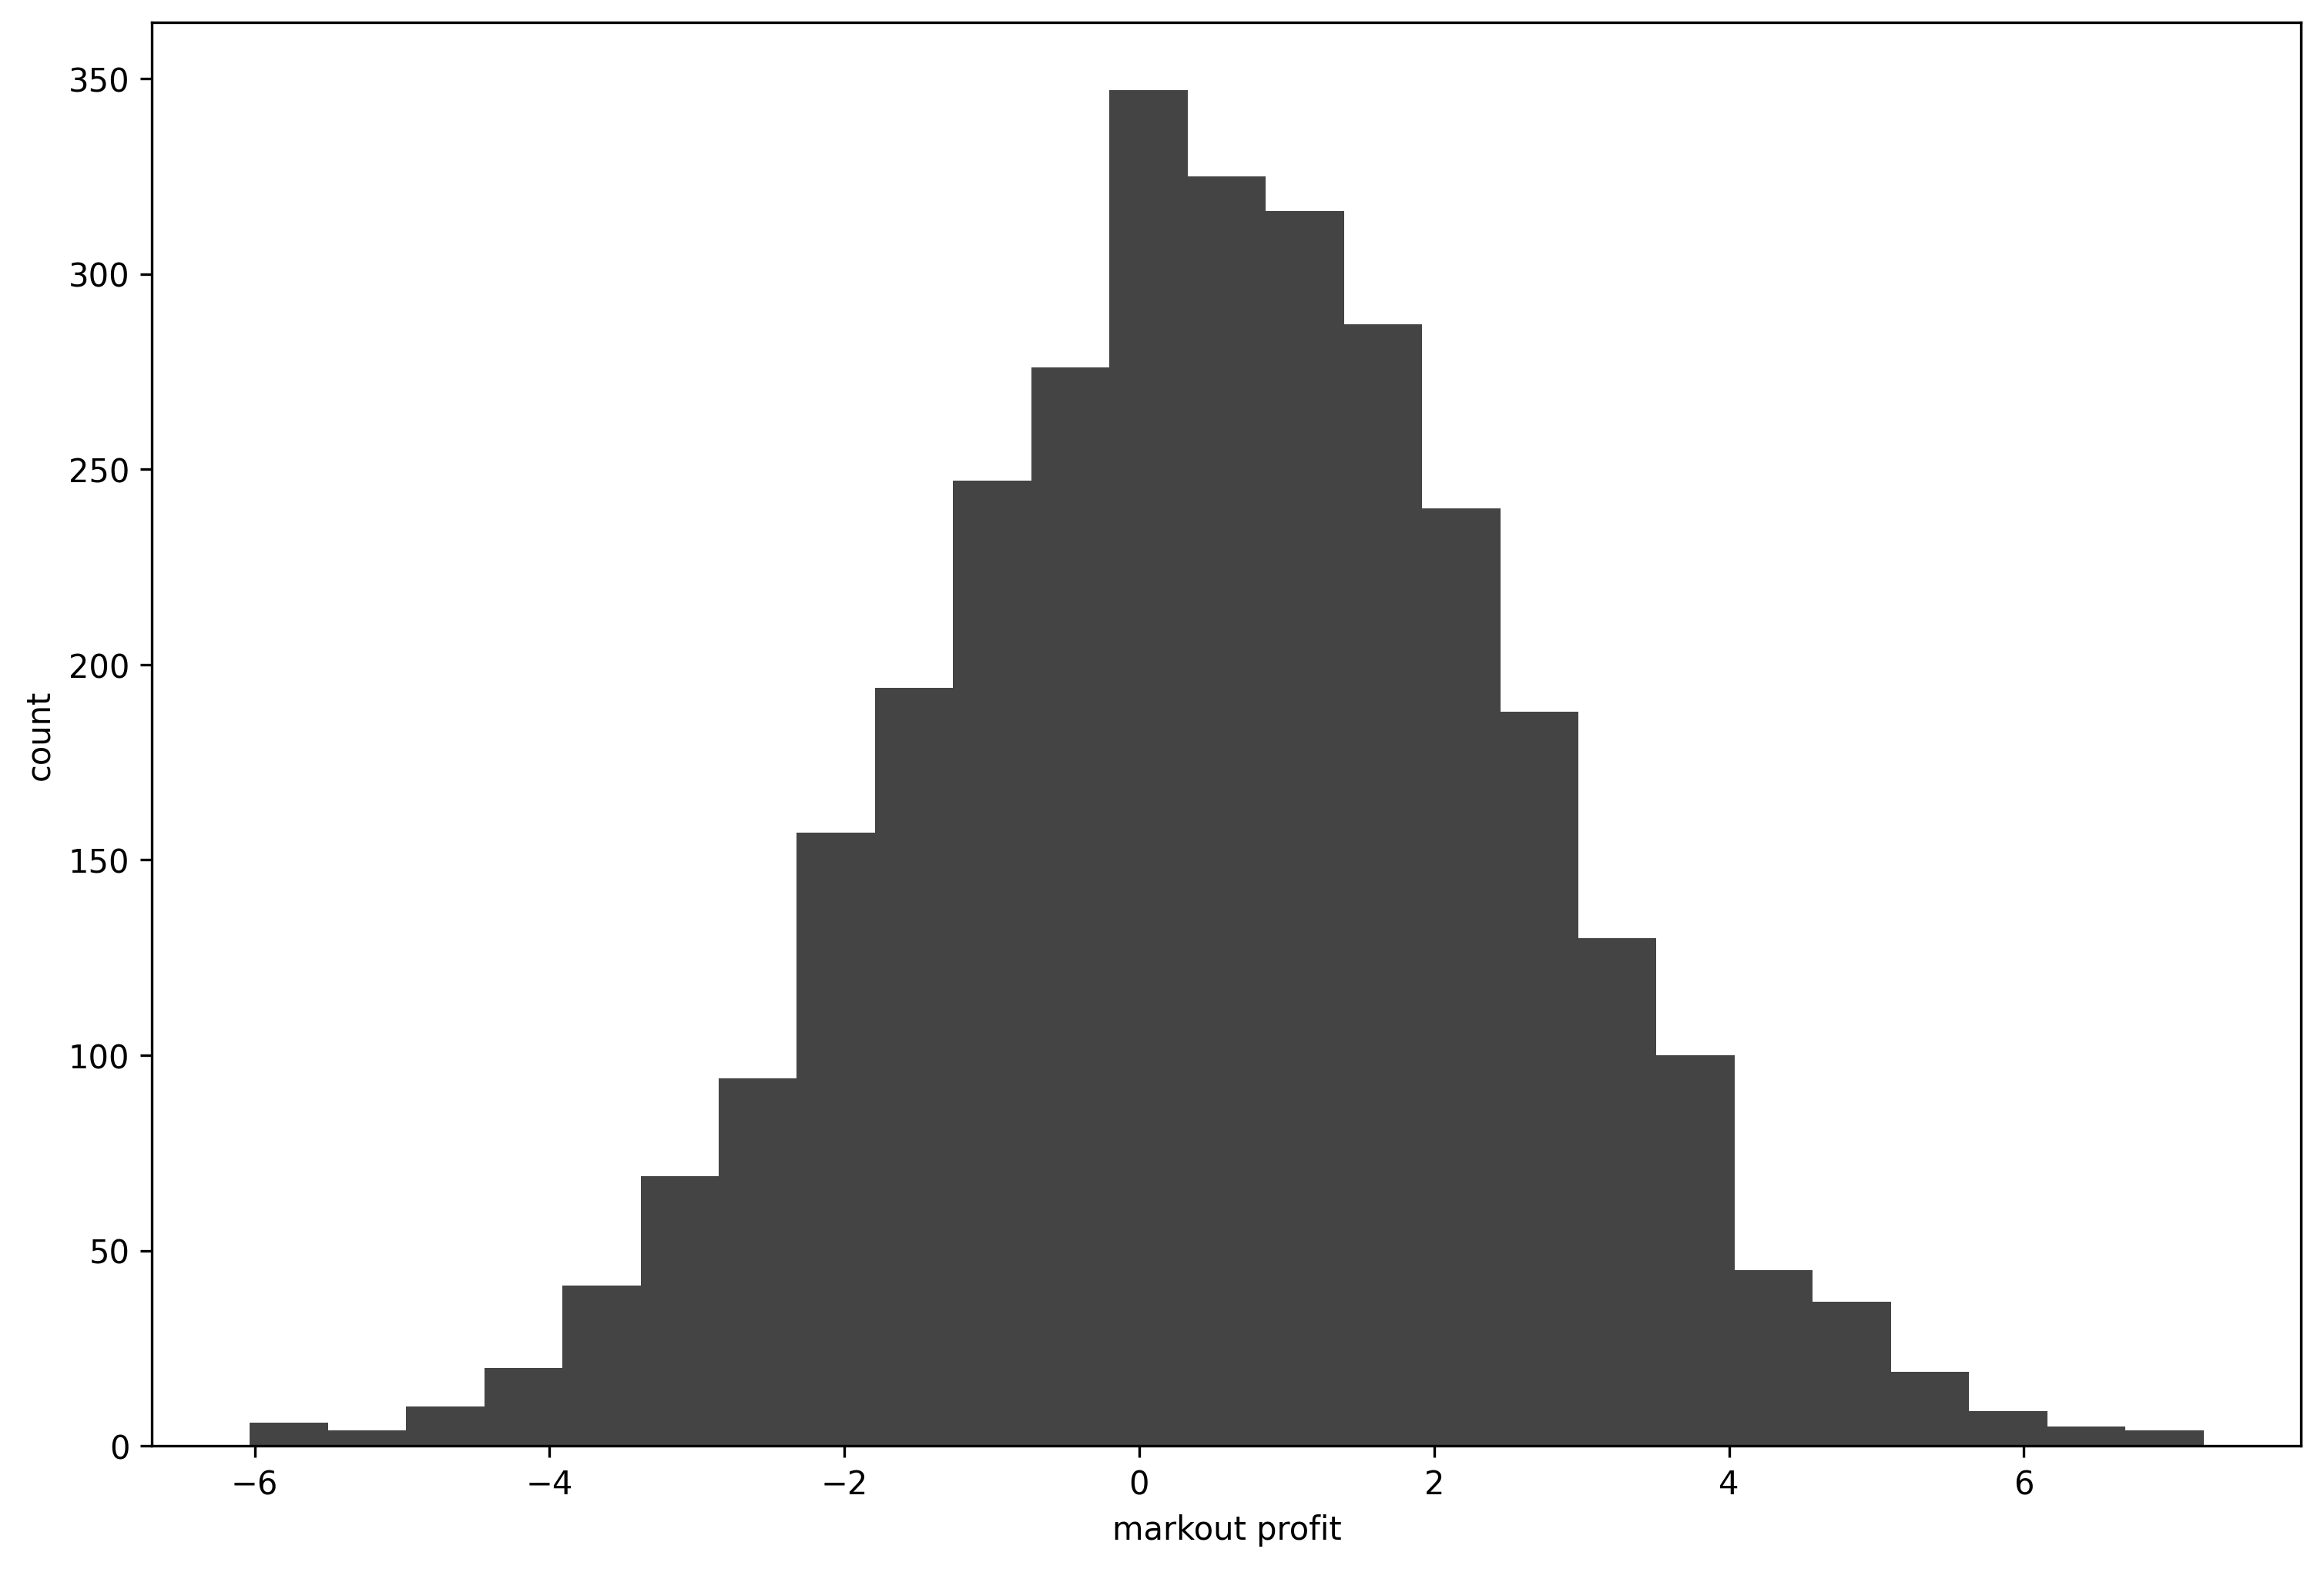

In [506]:
np.random.seed(17)
plt.figure(figsize=(12,8))
profit = np.array([markout_profit(threshold=1) for _ in range(10000)]) # version 'A' is threshold 1
i = np.where(profit != 0)[0]                            # where a trading decision was made
print(len(i), (len(profit) - len(i))/len(profit))       # number of trades, percentage of no trades
print(profit.mean(), profit.std())                      # overall average profit decisions, standard dev
print(profit[i].mean(), profit[i].std())                # average profit on trade decisions, standard dev
plt.hist(profit[i], 25, color=e4e.color_1)
plt.xlabel('markout profit')
plt.ylabel('count')
plt.show()

In [507]:
# Interpolation over continuous parameters
threshold_1 = 1
threshold_2 = 2
a = np.array([markout_profit(threshold_1) for _ in range(10000)]).mean()        # expected value for threshold_1
b = np.array([markout_profit(threshold_2) for _ in range(10000)]).mean()        # expected value for threshold_2
threshold_mid = (threshold_1 + threshold_2)/2                                   # interpolated threshold value
c = (a + b)/2                                                                   # interpolated expected value
d = np.array([markout_profit(threshold_mid) for _ in range(10000)]).mean()      # measured expected value
print(c,d)
error = (c - d)/c
print(error)

0.11168422215853321 0.1257233777626533
-0.12570401917821322


#### Choose the Parameter Values

Text(0.6, 2.2, '(d)')

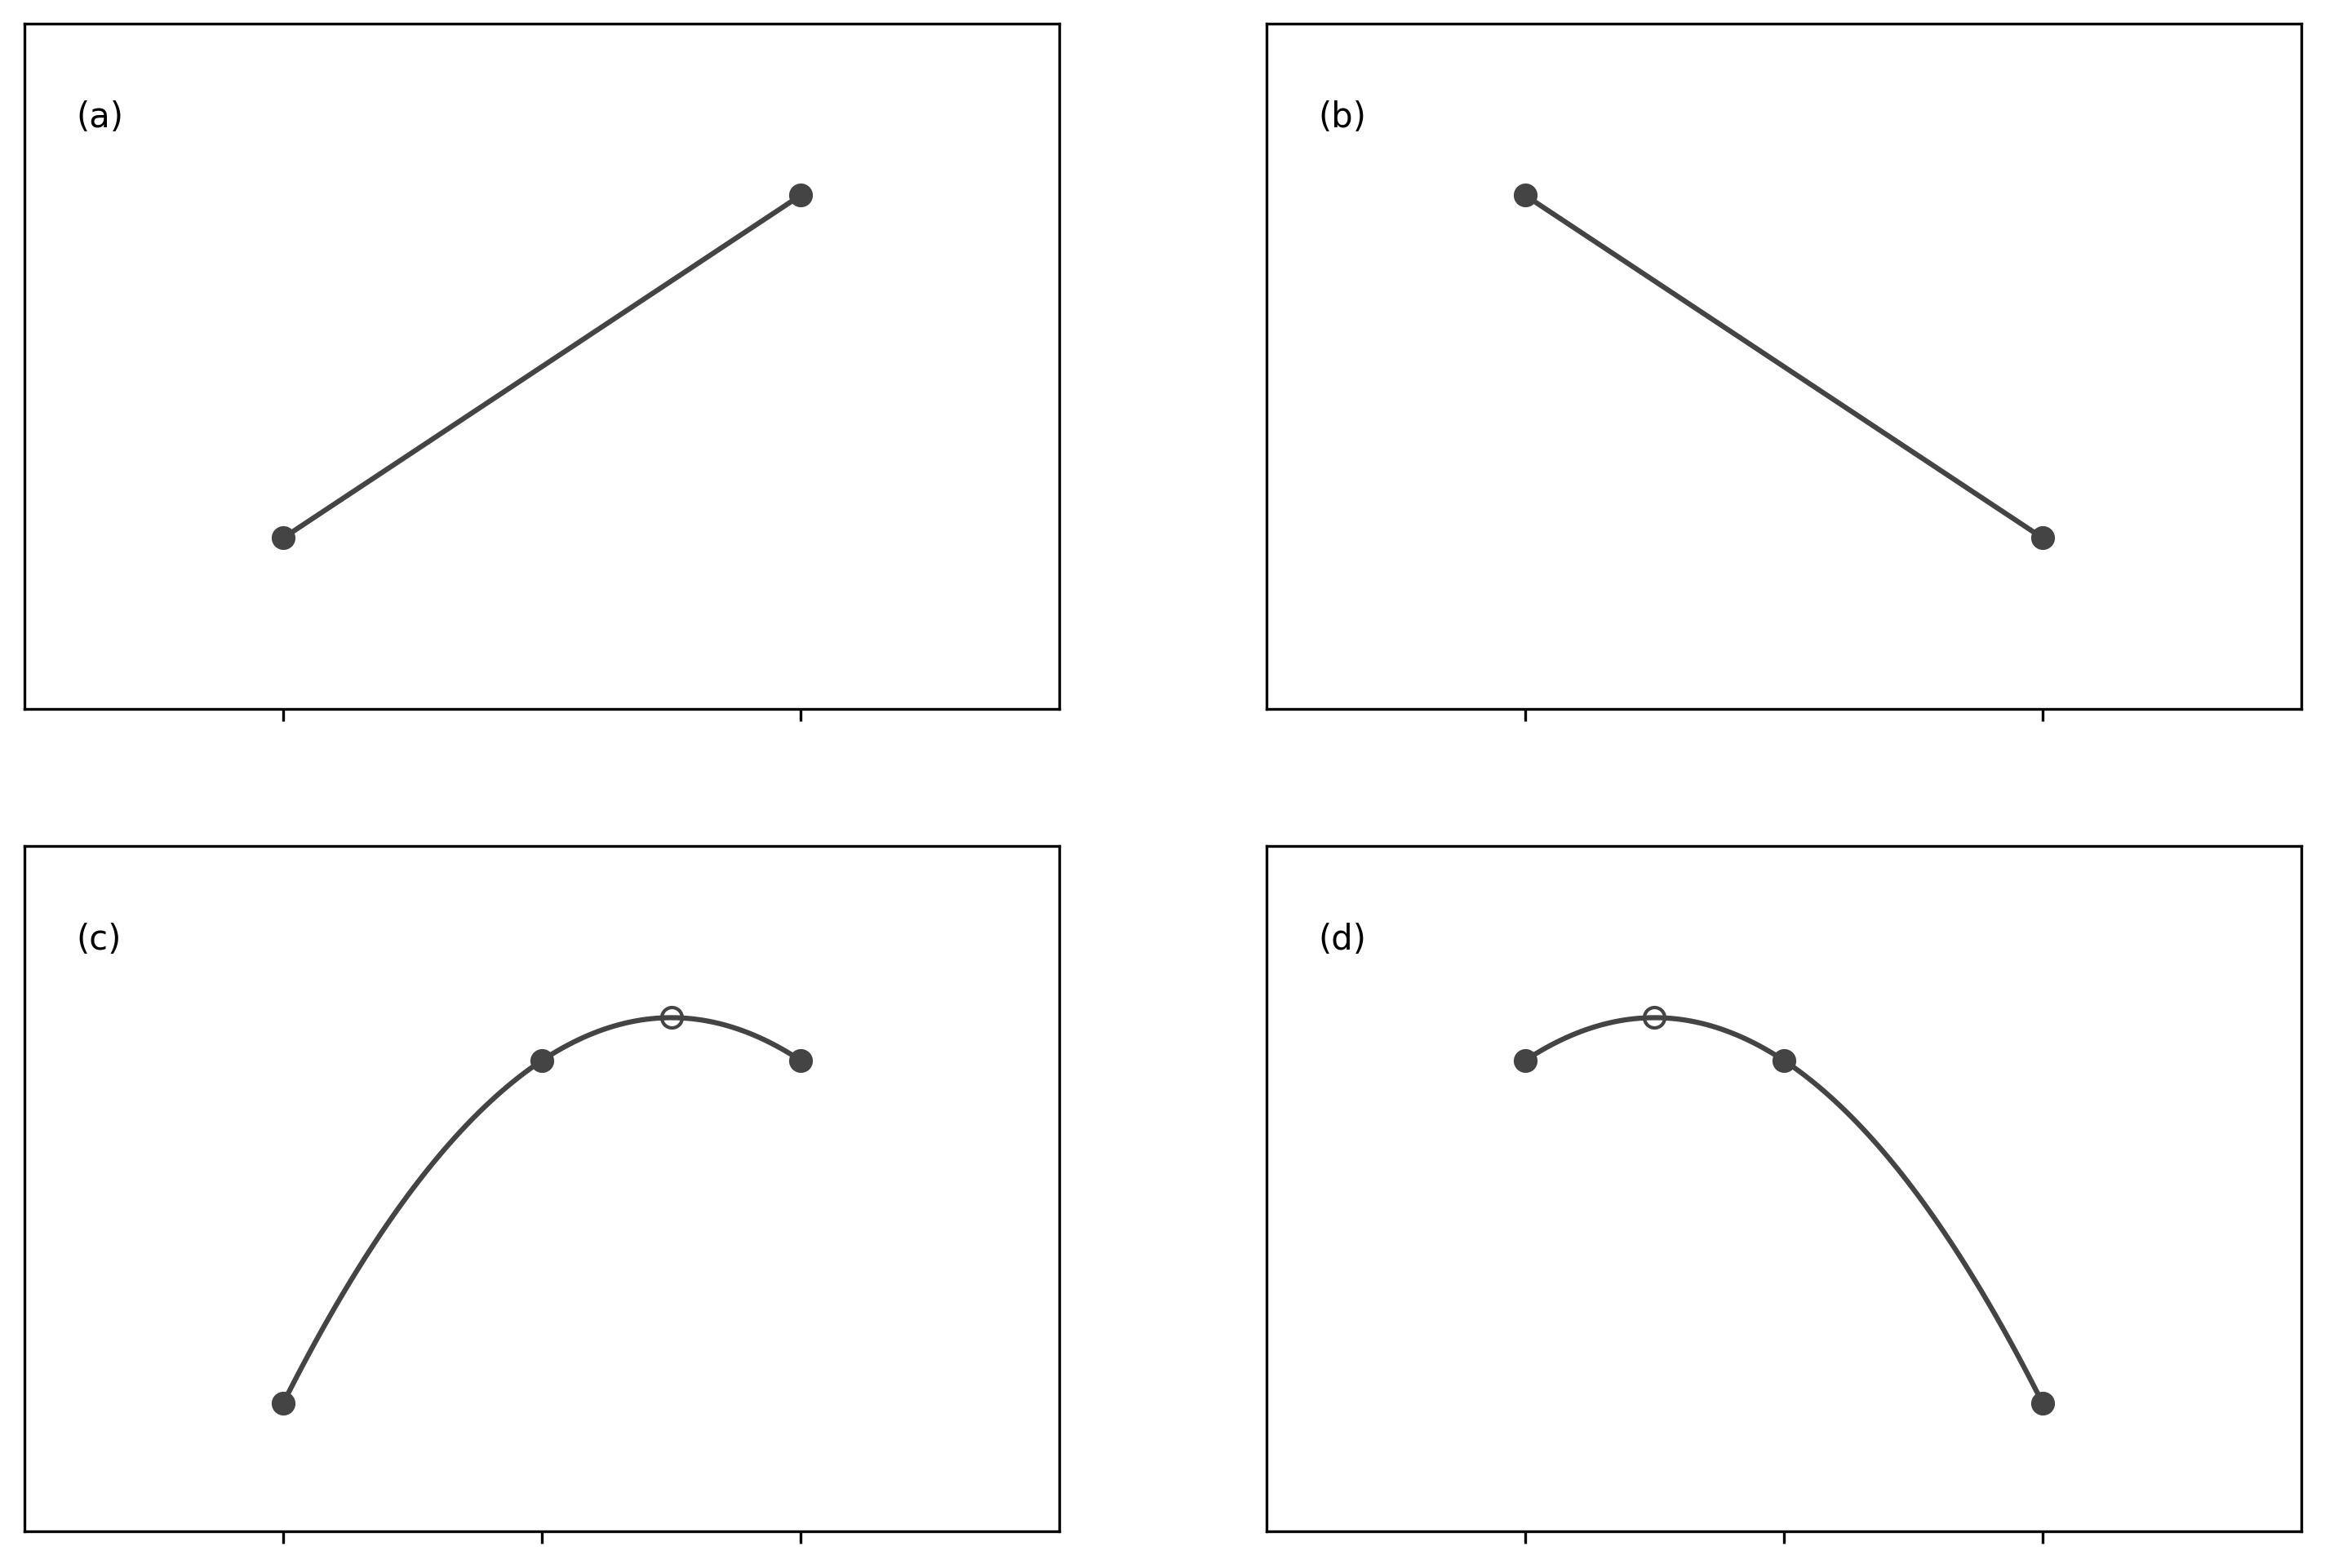

In [508]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))
# remove all axis ticks on all subplots
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])

# two measurements, ascending
x = [1,2]           
y = [1,2]
ax1.plot(x, y, linestyle='-', marker='o', color=e4e.color_1)  
ax1.axis([.5, 2.5, .5, 2.5])        # zoom in to xmin=.5, xmax=2.5, ymin=.5, ymin=2.5
ax1.set_xticks([1,2])               # show specified xticks
ax1.set_xticklabels('')             # remove xtick labels by replacing with empty string
ax1.text(.6, 2.2, '(a)')            # add text at specified x=.6, y=2.2

# two measurments descending
x = [1,2]           
y = [2,1]
ax2.plot(x, y, linestyle='-', marker='o', color=e4e.color_1)  
ax2.axis([.5, 2.5, .5, 2.5])        # zoom in to xmin=.5, xmax=2.5, ymin=.5, ymin=2.5
ax2.set_xticks([1,2])               # show specified xticks
ax2.set_xticklabels('')             # remove xtick labels by replacing with empty string
ax2.text(.6, 2.2, '(b)')            # add text at specified x=.6, y=2.2

# multiple measurements, ascending
x = np.arange(1, 2.001, .01)         
x0 = 1.75
y = 2 - 2 * (x-x0)**2
ax3.plot(x, y, linestyle='-', color=e4e.color_1)    # plot the smooth line representing surrogate function
ax3.plot([x[0], x[50], x[-1]], [y[0], y[50], y[-1]], 'o', color=e4e.color_1) # three individual measurements
i = np.where(np.abs(x-x0) < 0.001)[0]        # x points around x0=1.75
ax3.plot([x[i]],[y[i]], 'o', color=e4e.color_1, fillstyle='none')   # estimated based on measurements
ax3.axis([.5, 2.5, .5, 2.5])        # zoom in to xmin=.5, xmax=2.5, ymin=.5, ymin=2.5
ax3.set_xticks([1,1.5,2])           # show specified xticks
ax3.set_xticklabels('')             # remove xtick labels by replacing with empty string
ax3.text(.6, 2.2, '(c)')            # add text at specified x=.6, y=2.2

# multiple measurements, descending
x = np.arange(1, 2.001, .01)         
x0 = 1.25
y = 2 - 2 * (x-x0)**2
ax4.plot(x, y, linestyle='-', color=e4e.color_1)    # plot the smooth line representing surrogate function
ax4.plot([x[0], x[50], x[-1]], [y[0], y[50], y[-1]], 'o', color=e4e.color_1) # three individual measurements
i = np.where(np.abs(x-x0) < 0.001)[0]        # x points around x0=1.25
ax4.plot([x[i]],[y[i]], 'o', color=e4e.color_1, fillstyle='none')   # estimated based on measurements
ax4.axis([.5, 2.5, .5, 2.5])        # zoom in to xmin=.5, xmax=2.5, ymin=.5, ymin=2.5
ax4.set_xticks([1,1.5,2])           # show specified xticks for measurements
ax4.set_xticklabels('')             # remove xtick labels by replacing with empty string
ax4.text(.6, 2.2, '(d)')            # add text at specified x=.6, y=2.2

#### Determine the number of Individual Measurements

In [509]:
profit.mean()           # measured expected value of version 'A', all other values of threshold are version 'B'

0.16772931916527353

In [510]:

sd_delta = 1.2      # standard deviation of delta from individual measurements
print("sd_delta = ", sd_delta, profit.std()) # standard deviation delta, standard deviation of version A data
prac_sig = 0.03
print("prac_sig = ", prac_sig, .2 * profit.mean()) # practical significance as percentage of prior experience
num_ind = (2.48 * sd_delta / prac_sig)**2   # num individual measurements when version 'B' is only one value
print("num_ind = ", num_ind)
num_ind = (3.08 * sd_delta / prac_sig)**2   # num individual measurements when version 'B' is two or more values
print("num_ind = ", num_ind)

sd_delta =  1.2 1.1526132002976512
prac_sig =  0.03 0.03354586383305471
num_ind =  9840.640000000001
num_ind =  15178.239999999998


#### Run and analyze the experiment

In [511]:
def run_experiment(num_ind, thresholds):
    individual_measurements = {
        threshold: [] for threshold in thresholds       # business metrics measured at each parameter value
    }
    done = set()
    while True:
        threshold = np.random.choice(thresholds)        # randomly choose which parameter value to measure
        profit = markout_profit(threshold)              # make business metric measurements
        individual_measurements[threshold].append(profit)        # store business measurement for parameter
        if (len(individual_measurements[threshold]) >= num_ind): # enough measurements for current parameter
            done.add(threshold)
        if len(done) == len(thresholds):    # if all parameters have enough measurements, break
            break 

    aggregate_measurements = []             
    standard_errors = []
    for threshold in thresholds:                                # loop through parameter list
        ims = np.array(individual_measurements[threshold])      # access measurements of parameter key
        aggregate_measurements.append(ims.mean())         # aggregate measurement of current parameter
        standard_errors.append(ims.std() / np.sqrt(len(ims))) # standard error of average measurement
    
    return aggregate_measurements, standard_errors 

In [512]:
# simulate a few experiments
np.random.seed(17)
thresholds = np.array([0.5, 1.0, 1.5])      # specify the parameter for which we are taking measurements
aggregate_measurements, standard_errors = run_experiment(1500, thresholds)

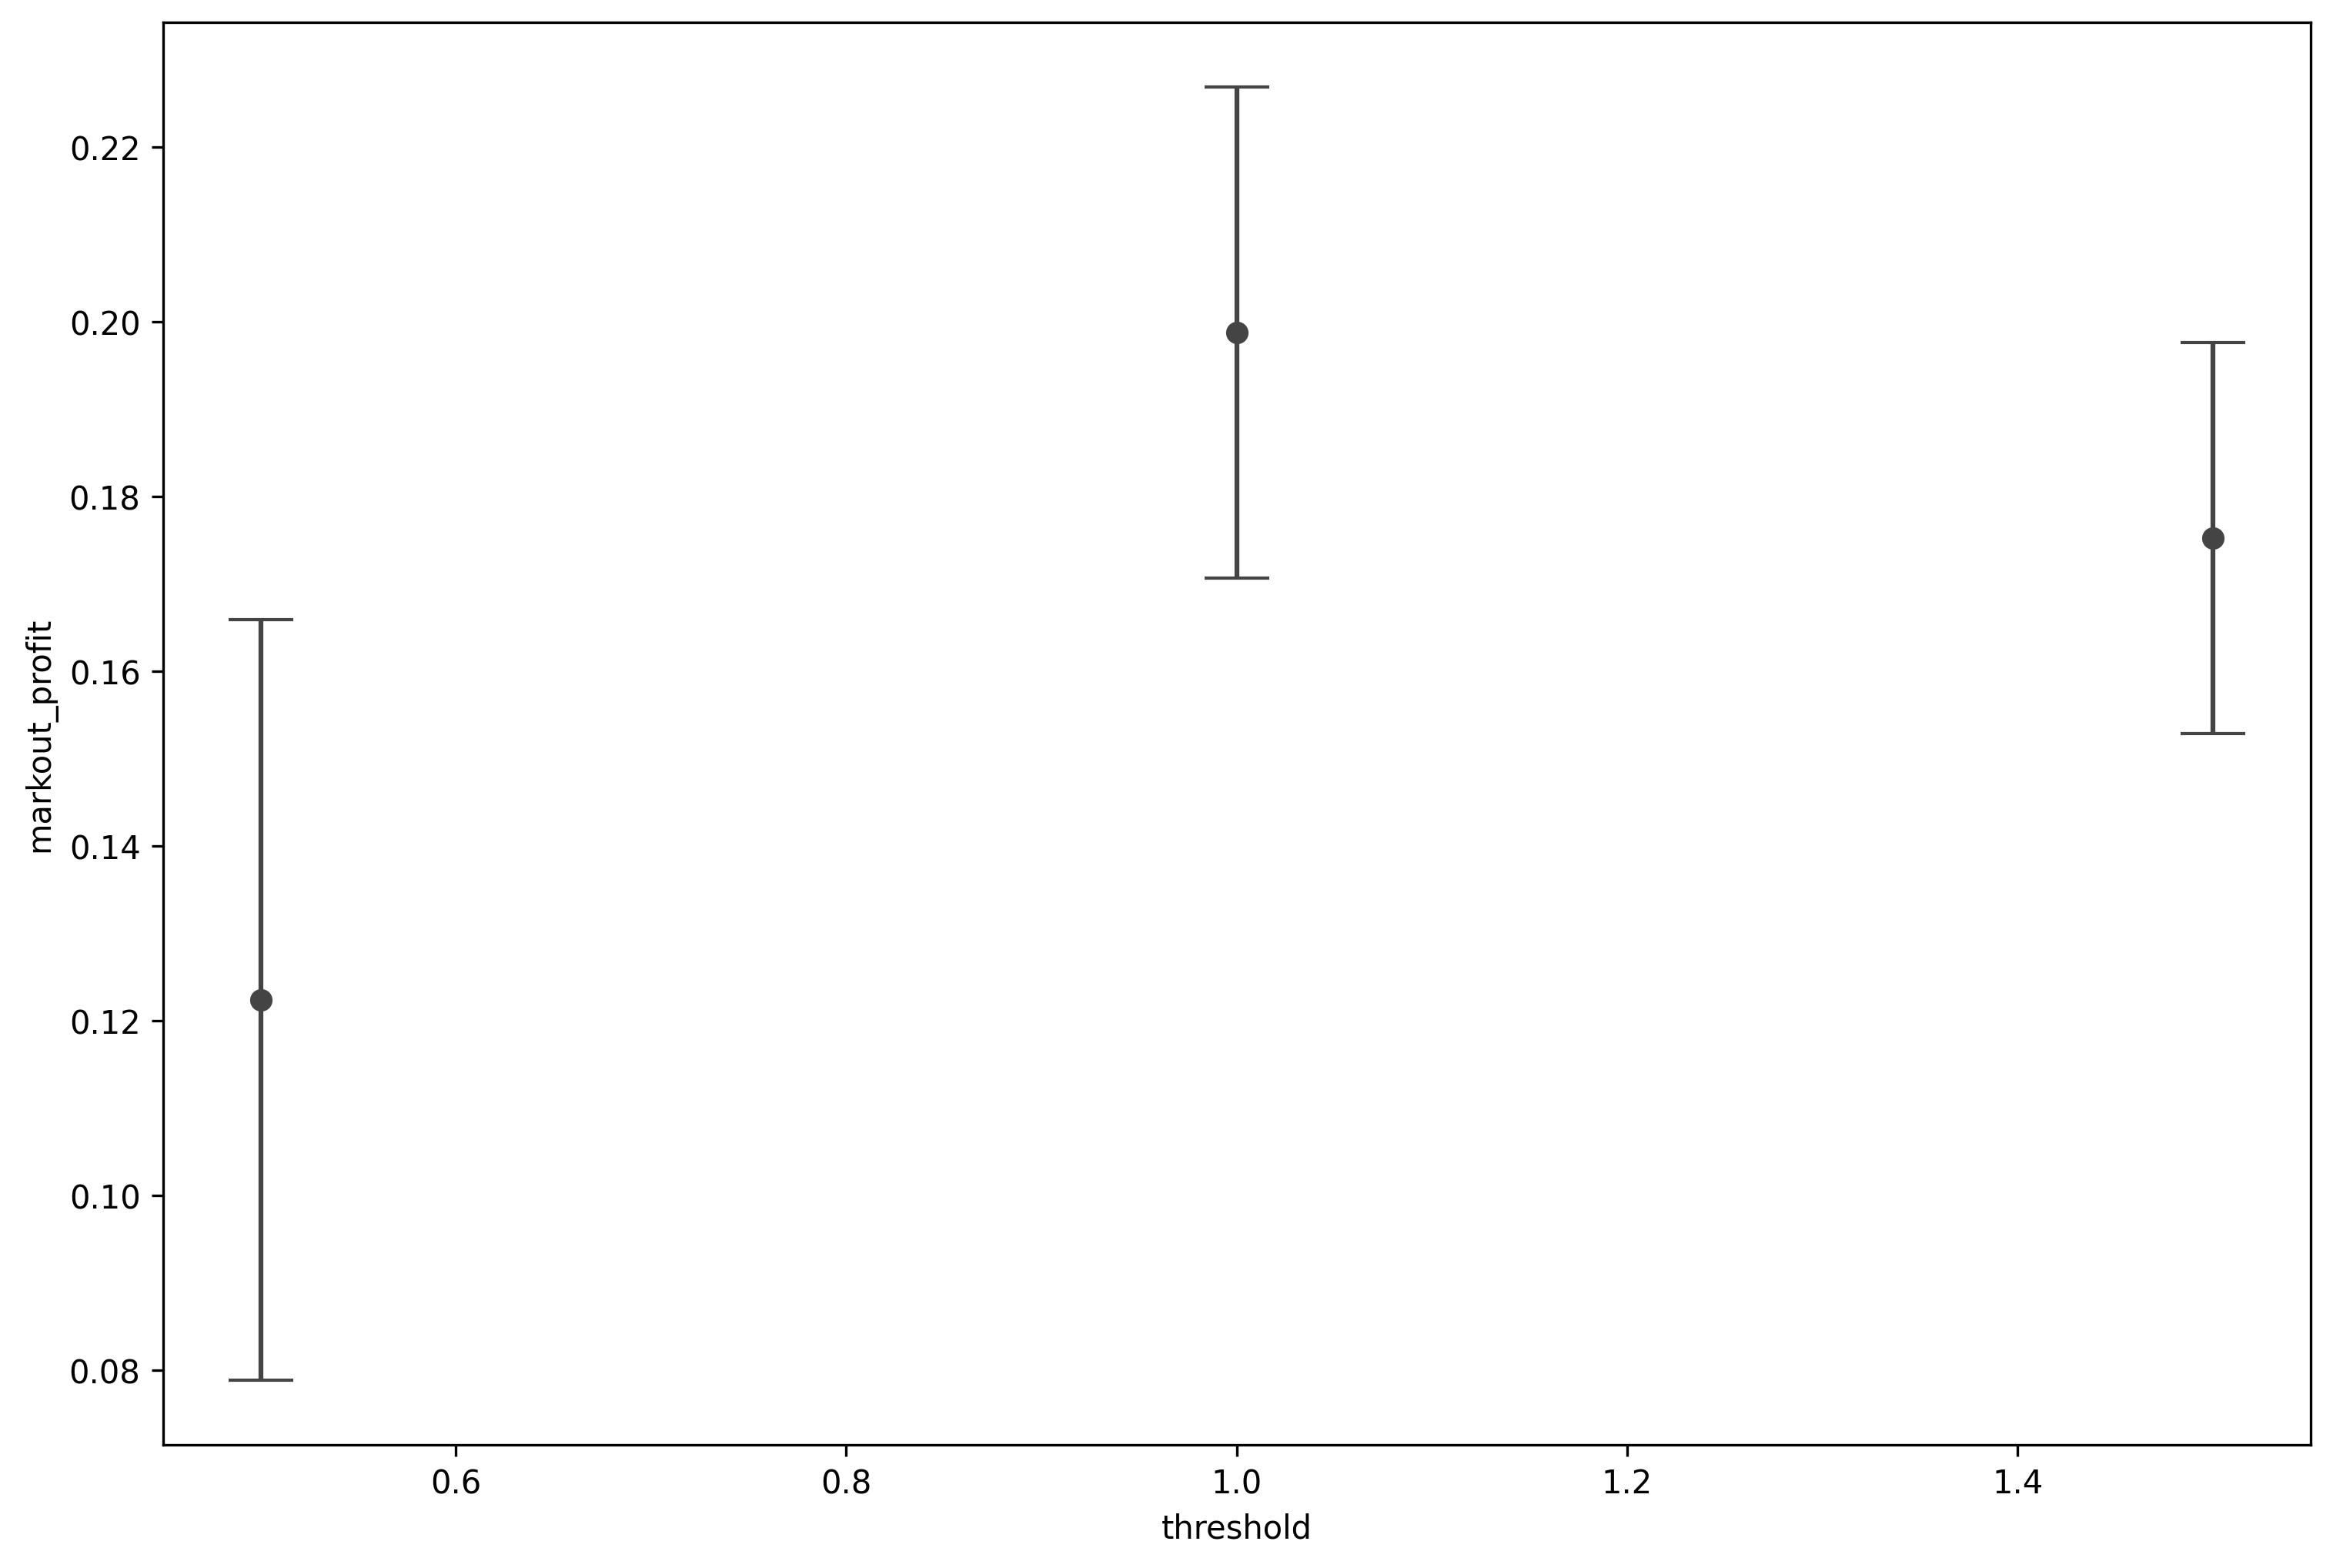

In [513]:
plt.figure(figsize=(12,8))
plt.errorbar(thresholds, aggregate_measurements,  # x, y
             yerr=standard_errors,      # errorbar sizes in the y direction
             fmt='o', color=e4e.color_1, capsize=10)    # plot x,y wit attached errorbars
plt.xlabel('threshold')
plt.ylabel('markout_profit')
plt.show()

#### Analyze I: Interpolate between measurments

The model / surrogate function, a parabola from linear regression

$y$ = $\beta_0 + \beta_1X + \beta_2x^2 + \epsilon$  

$\hat{y}$ = $\beta_0 + \beta_1X + \beta_2x^2$ 

$y$ = aggregate measurement 

$\hat{y}$ = interpolation estimate

$x$ = threshold value

$\beta_0, \beta_1, \beta_2$ = parameters of the model; determined by linear regression

$\epsilon$ = approximation error, difference between the interpolation estimate and measured value

or in vectorized form

$y$ = $X\beta + \epsilon$           

$y$ = vector of aggregate measurement

$\beta$ = vector of model paramters

$X$ = matrix of column of 1s, column of threshold values and column of threshold squared values

The solution, given by the normal equation is

$\beta = (X^TX)^{-1}(X^Ty)$

In [514]:
# Fit a one-parameter model using linear regression
def linear_regression(thresholds, aggregate_measurements):
    x = thresholds 
    y = aggregate_measurements      
    X = np.array([np.ones(len(y)), x, x**2]).T      # compact form of model, parabola
    beta = np.linalg.inv(X.T @ X) @ (X.T @ y)       # calculate beta vector using normal equation
    return beta

In [515]:
beta = linear_regression(thresholds, aggregate_measurements) # surrogate model a parabola via linear regression
print(beta)

[-0.05395724  0.45255601 -0.19984533]


In [516]:
def interpolate(thresholds, beta):
    xhat = np.arange(thresholds.min(),              # create array of threshold values 
                     thresholds.max()+ 1e-6, .01)   # add 1e-6 so that max() is included in range
    Xhat = np.array([np.ones(len(xhat)), xhat, xhat**2]).T  # create matrix
    yhat = Xhat @ beta                              # use beta weights to make estimates (interpolated values)
    return xhat, yhat

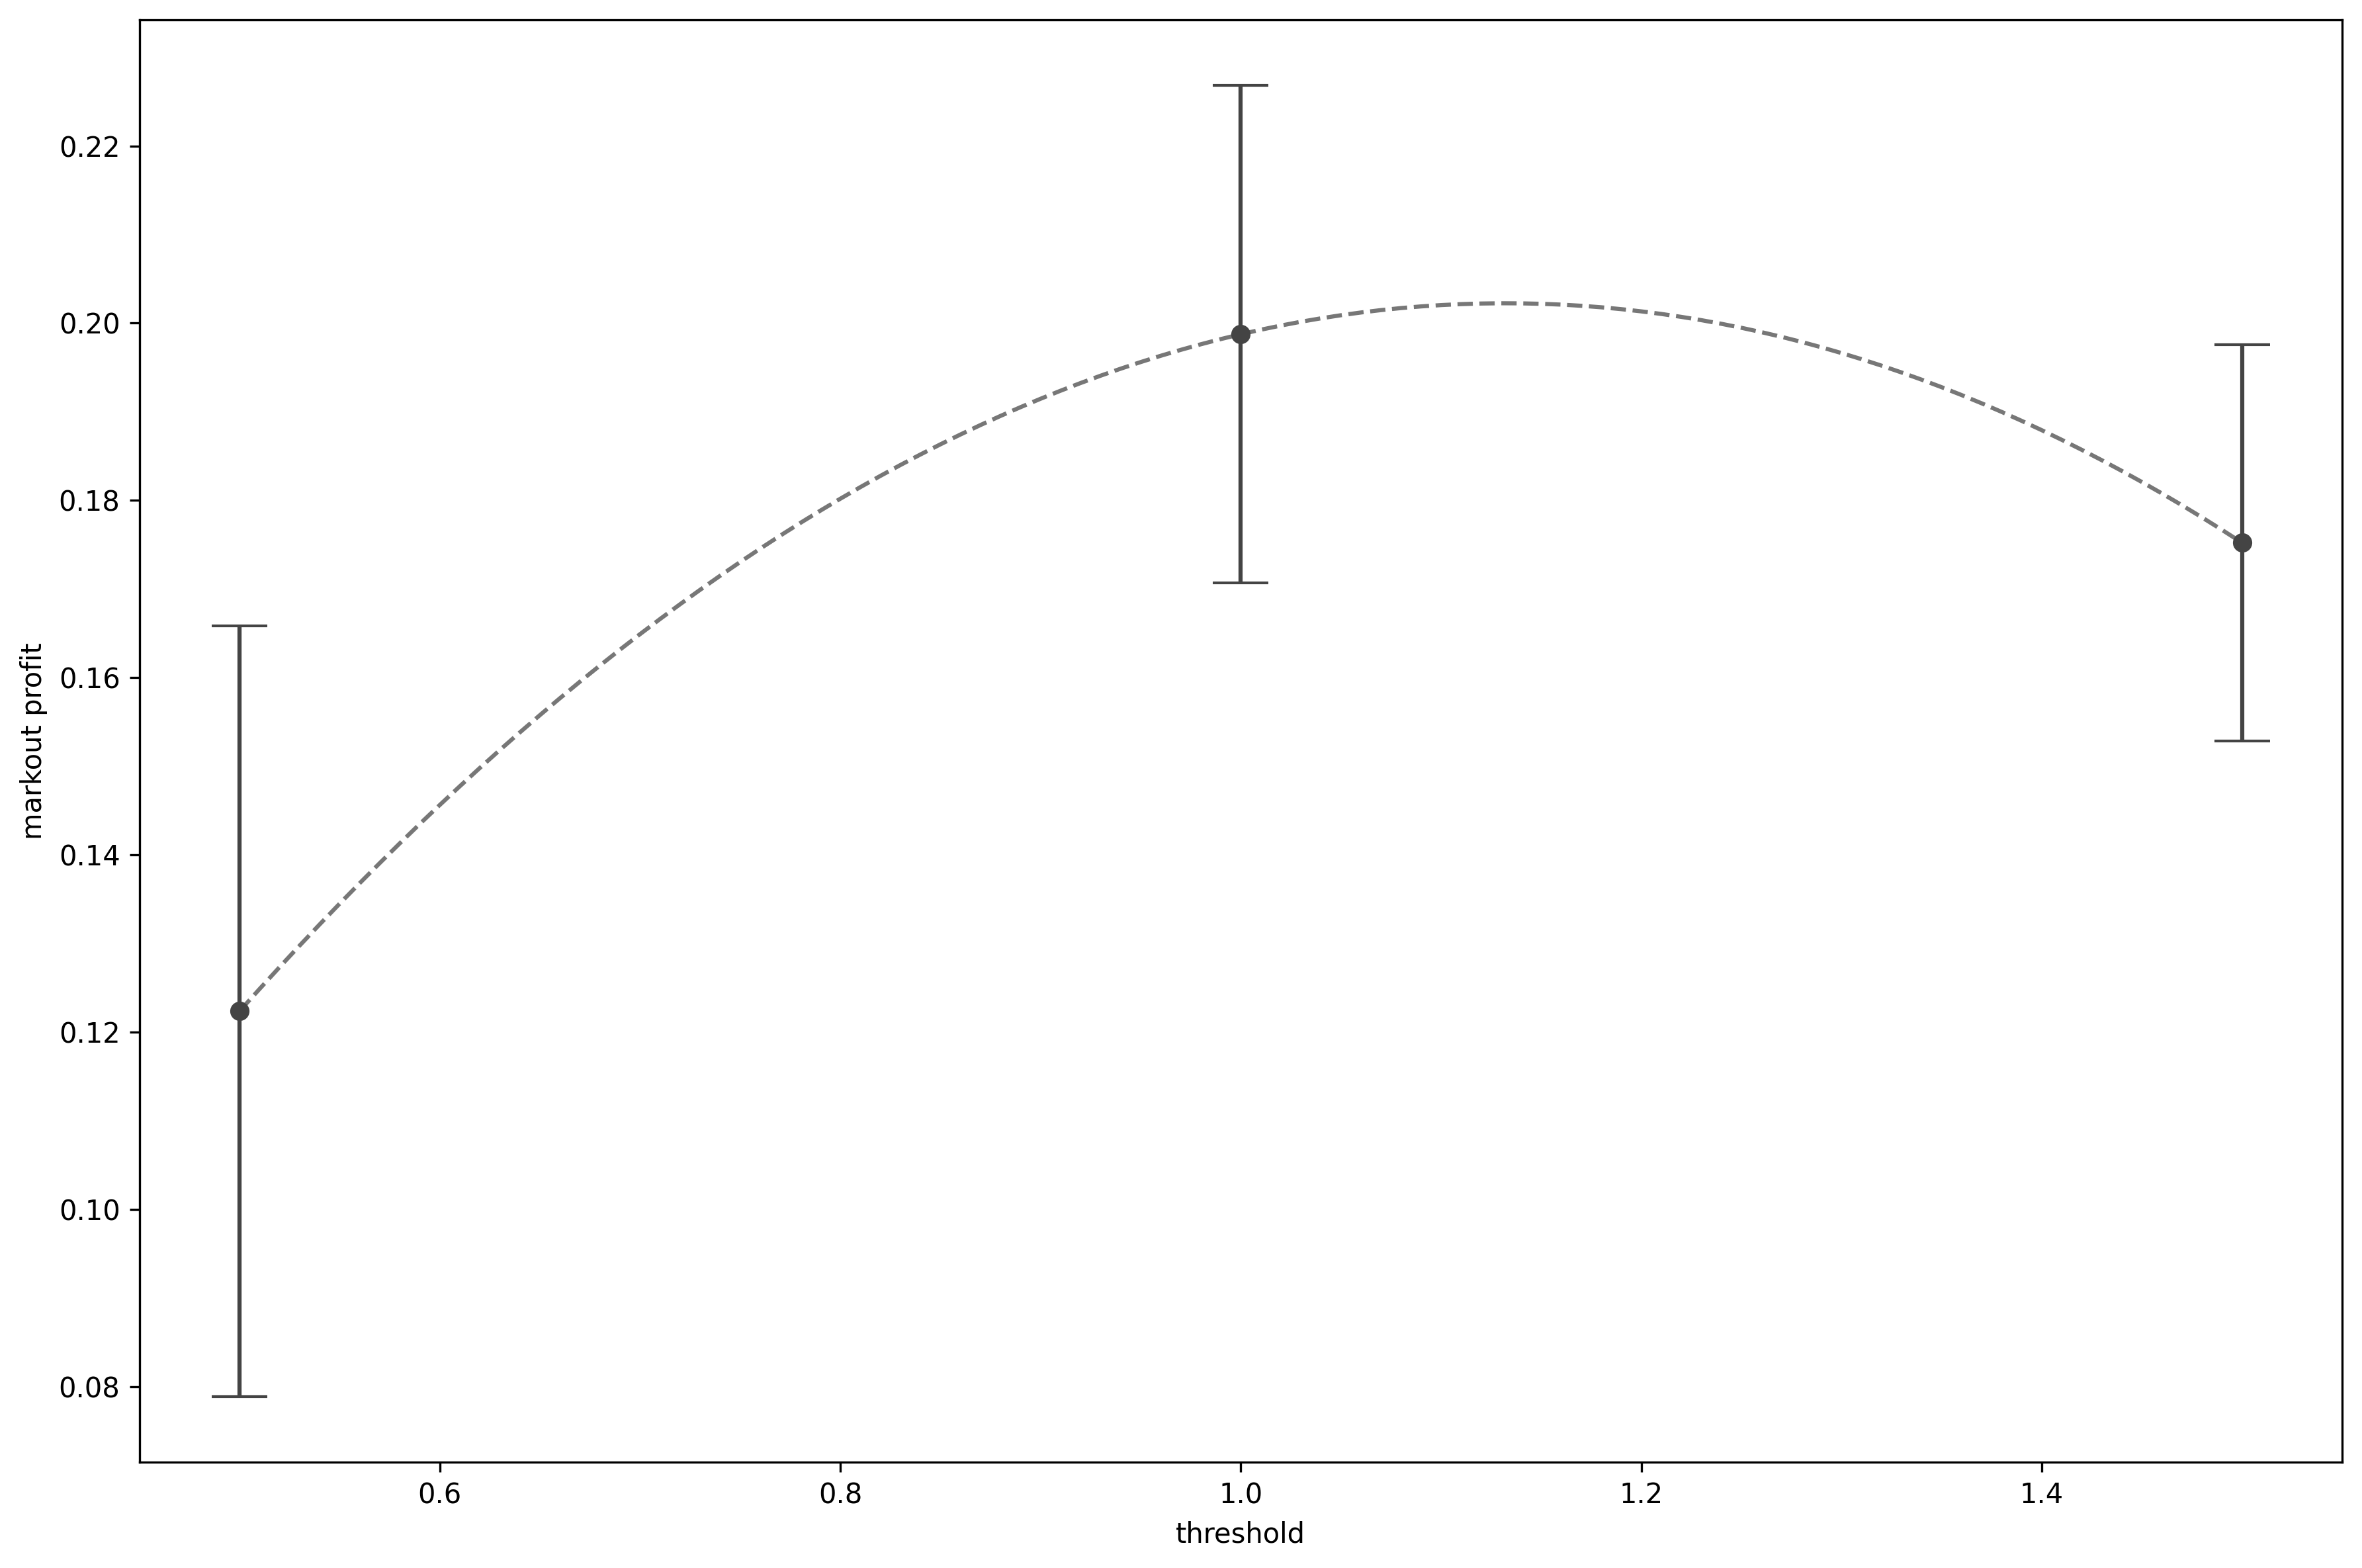

In [517]:
plt.figure(figsize=(12,8))
plt.errorbar(thresholds, aggregate_measurements,
             yerr=standard_errors,
             fmt='o', color=e4e.color_1, capsize=10)
xhat, yhat = interpolate(thresholds, beta)
plt.plot(xhat, yhat, '--', color=e4e.color_2)       # plot the interpolated thresholds and profit
plt.xlabel('threshold')
plt.ylabel('markout profit')
plt.tight_layout()
plt.show()

#### Analyze II: Optimize the business metric

In [518]:
def optimize(thresholds, beta):
    xhat, yhat = interpolate(thresholds, beta)      # get arrays of xhat and yhat 
    i = np.where(yhat == yhat.max())[0][0]
    return xhat[i], yhat[i]  # return xhat (threshold) that maximizes yhat (estimated profit)

In [519]:
threshold_opt, estimated_max_profit = optimize(thresholds, beta)
print(threshold_opt, estimated_max_profit)

1.1300000000000006 0.20224854744336007


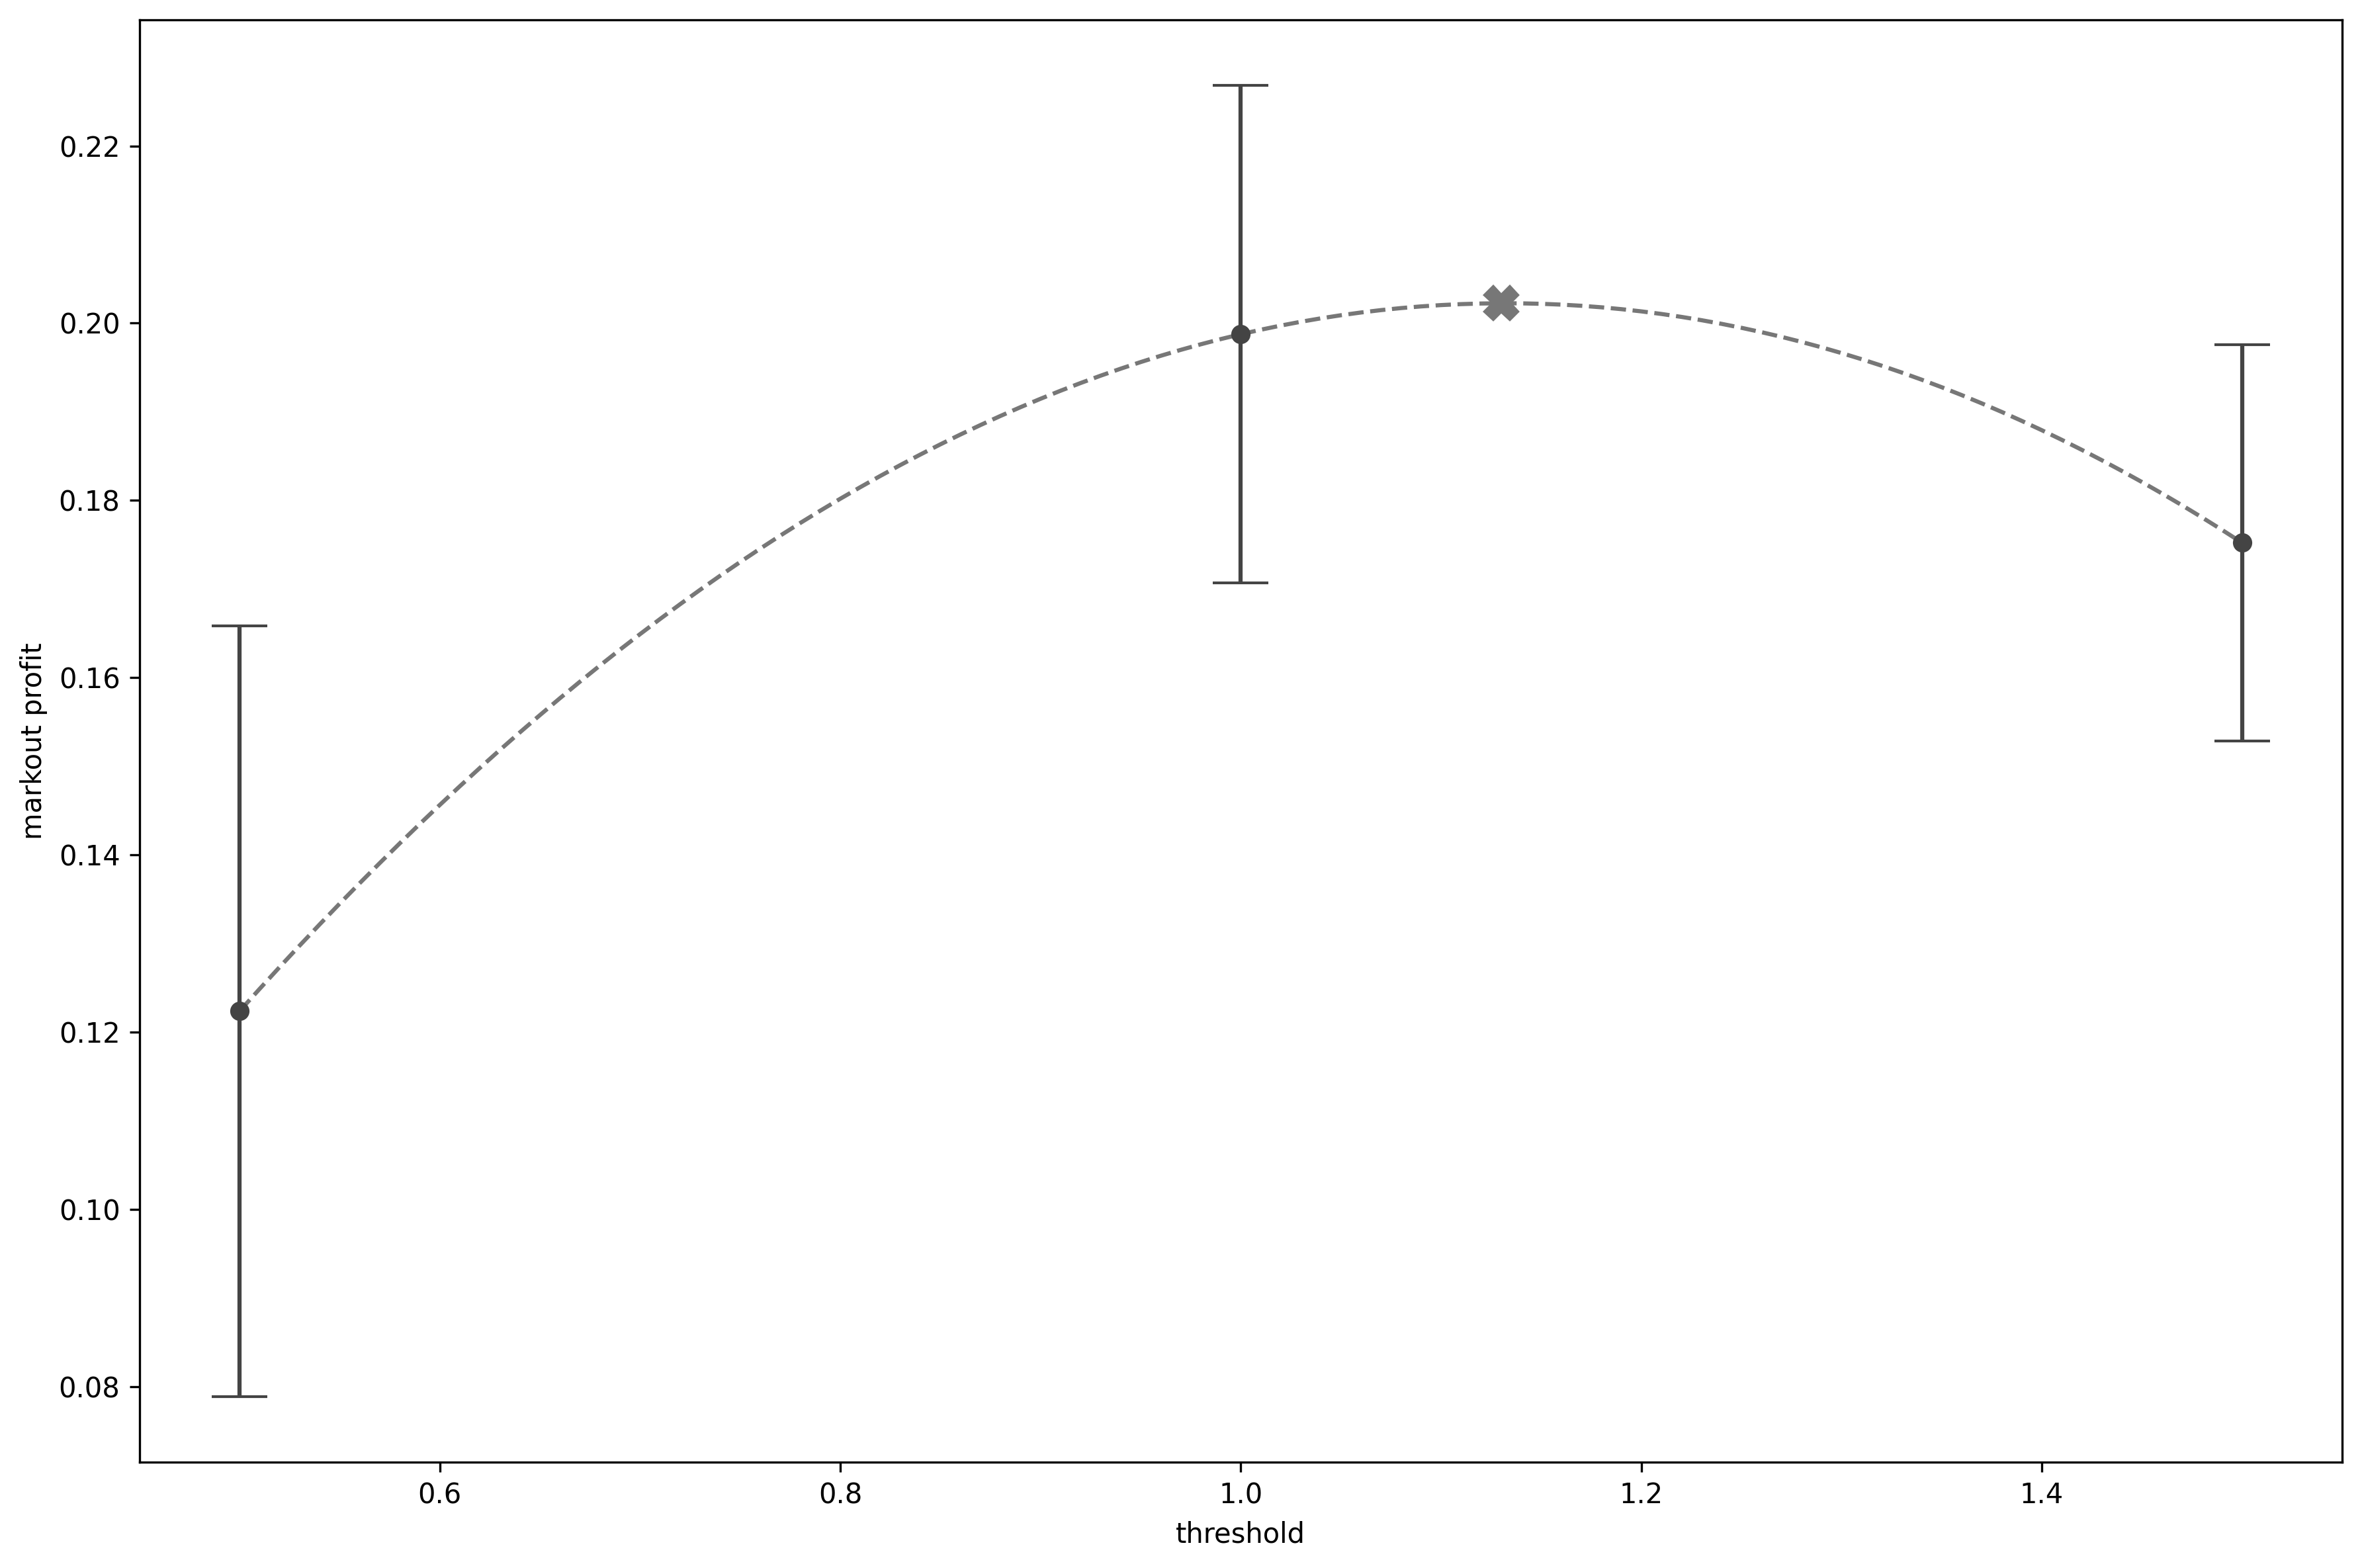

In [520]:
plt.figure(figsize=(12,8))
plt.errorbar(thresholds, aggregate_measurements,
             yerr=standard_errors,
             fmt='o', color=e4e.color_1, capsize=10)
xhat, yhat = interpolate(thresholds, beta)
plt.plot(xhat, yhat, '--', color=e4e.color_2)       # plot the interpolated thresholds and profit
plt.plot(threshold_opt, estimated_max_profit, 'X', 
         color=e4e.color_2, markersize=12) # plot optimal threshold and profit
plt.xlabel('threshold')
plt.ylabel('markout profit')
plt.tight_layout()
plt.show()

#### Validate the optimal parameter value

In [521]:
np.random.seed(17)
aggregate_measurement, standard_error = run_experiment(15000,[threshold_opt]) # validation aggregate measurement
print(aggregate_measurement[0] - 2*standard_error[0],
      aggregate_measurement[0] + 2*standard_error[0])  # is estimate in 95% confidence interval of measurement?

0.1408037513096334 0.1752831528347294


### Tune two or more continuous parameters

In [522]:
def markout_profit_2D(threshold, order_size):
    '''both profit and adverse selection cost increase with order size but at different rates'''
    cost = 1                                    # cost of trading per share
    pps = 1                                     # profit per share
    asc = 0.001*np.exp(2*order_size)            # adverse selection cost (cost of order size too big)
    signal = np.random.normal()                 # signal (market data) trading decisions; unit normal       
    eps = 2*np.random.normal()                  # epsilon, market fluctuations; unit normal
    if (signal > threshold or                   # strong positive signal, buy
        signal < -threshold):                   # strong negative signal, sell
        profit = order_size*(pps*np.abs(signal) - cost + eps) - asc 
    else :
        profit = 0                              # no trade, no profit, signal not strong enough
    return profit

#### Design the experiment

Text(0.5, 1.0, '(c)')

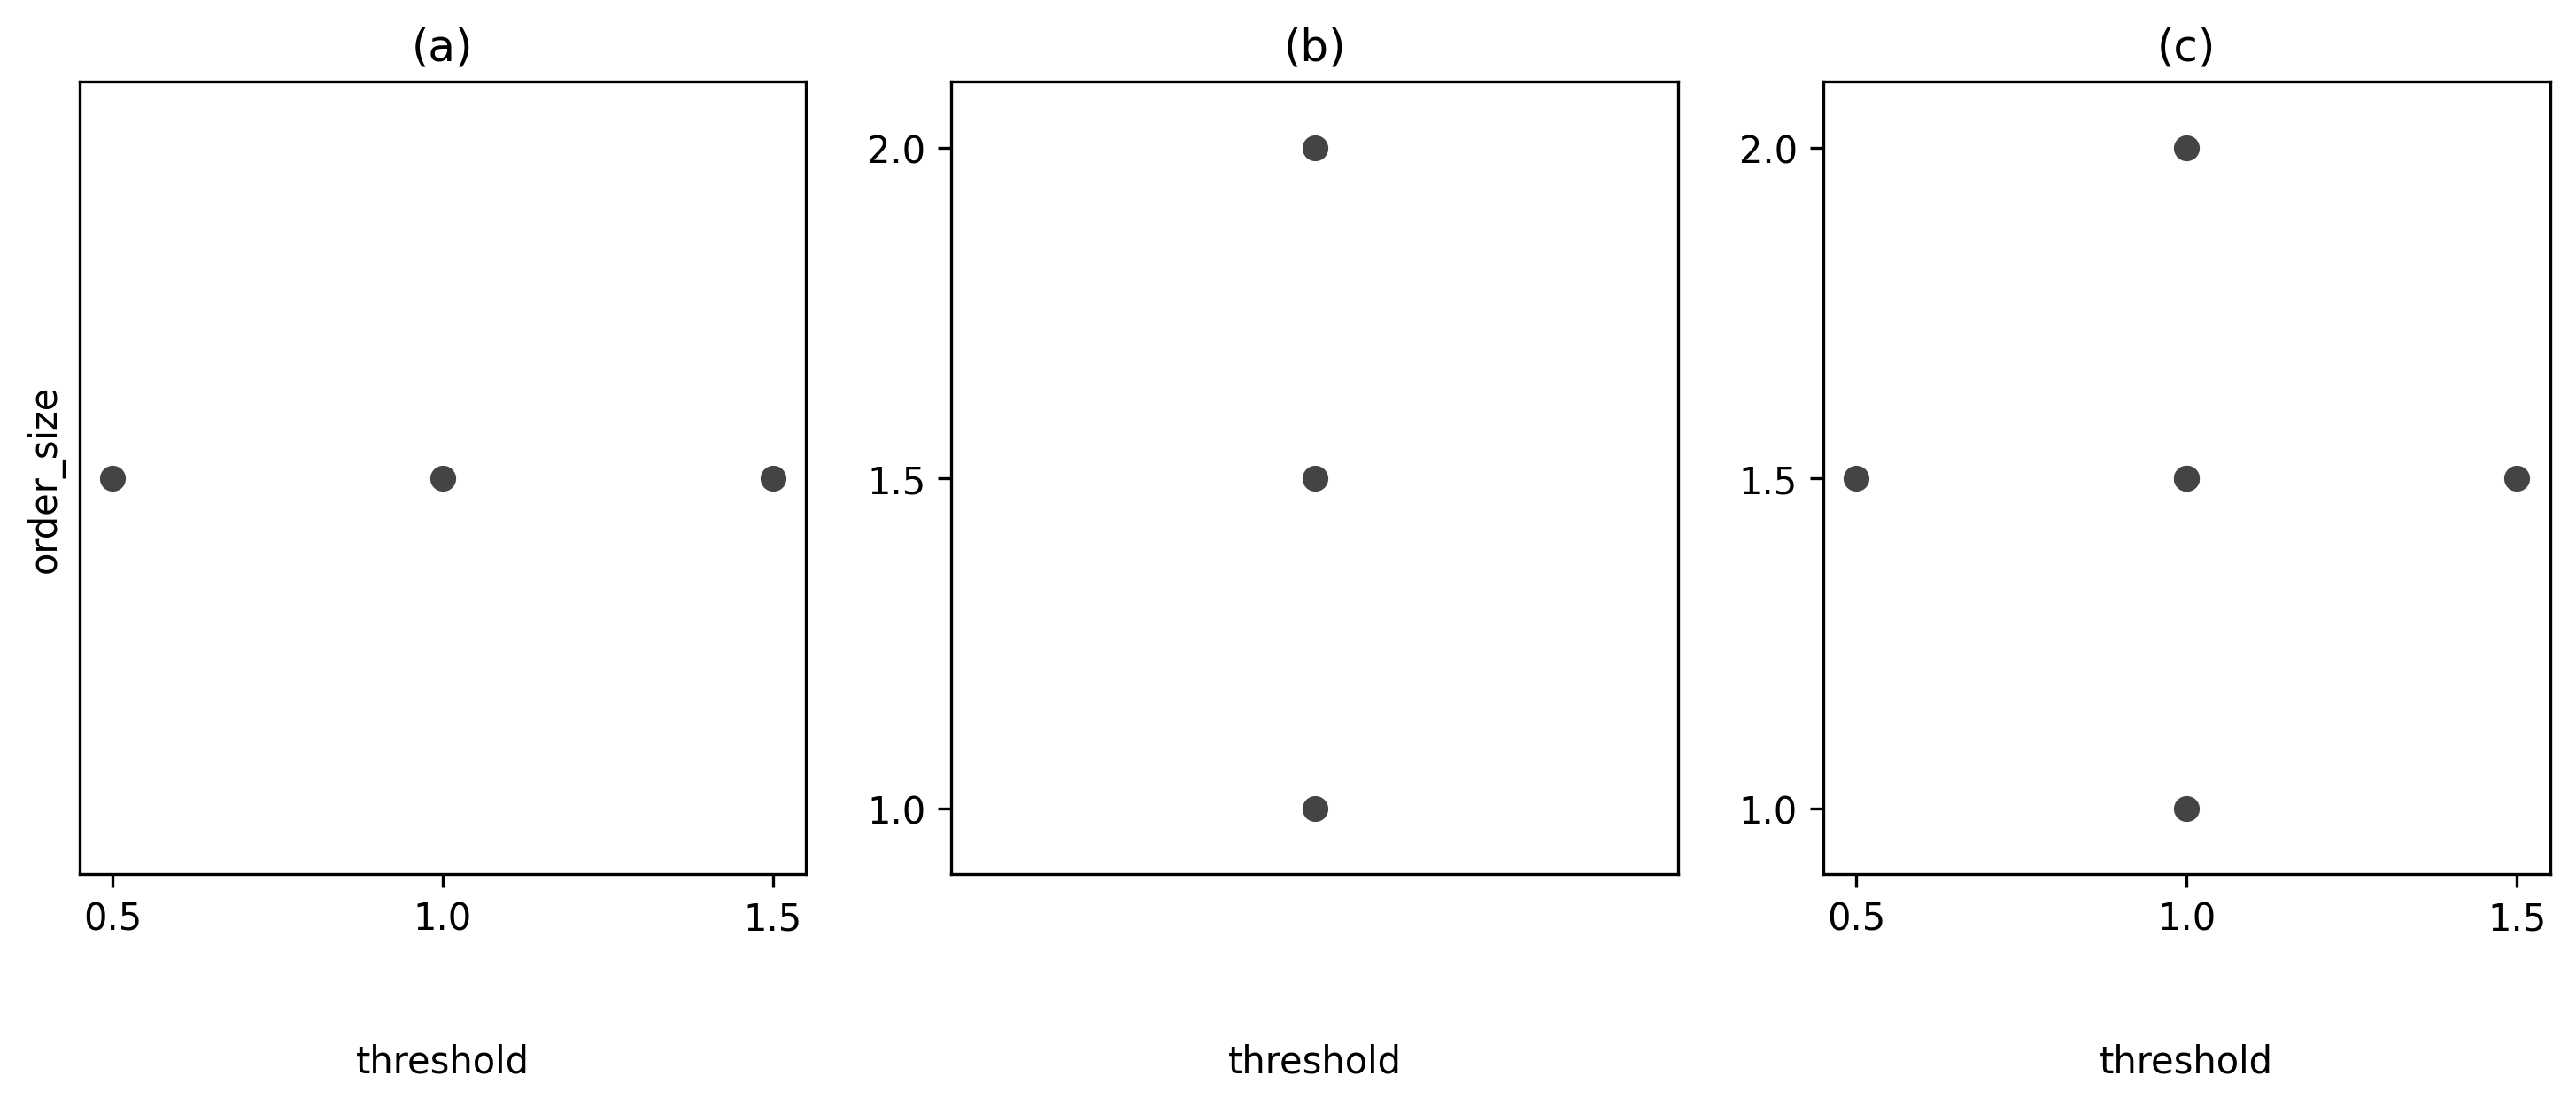

In [523]:
thresholds = [0.5, 1.0, 1.5]
order_sizes = [1, 1.5, 2]
axes = [.45, 1.55, .9, 2.1]
aspect = (thresholds[-1] - thresholds[0]) / (order_sizes[-1] - order_sizes[0])

fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(12,8))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])

ax1.plot(thresholds, [1.5, 1.5, 1.5], 'o', color=e4e.color_1)
ax1.axis(axes)
ax1.set_aspect(aspect)
ax1.set_xticks(thresholds)
ax1.text(1.0, .6, 'threshold', ha='center')
ax1.set_title('(a)')
ax1.set_ylabel('order_size')

ax2.plot([1.0, 1.0, 1.0], order_sizes, 'o', color=e4e.color_1)
ax2.axis(axes)
ax2.set_aspect(aspect)
ax2.set_yticks(order_sizes)
#ax2.set_xticks([-1.0])
ax2.text(1.0, .6, 'threshold', ha='center')
ax2.set_title('(b)')

ax3.plot(thresholds, [1.5, 1.5, 1.5], 'o', color=e4e.color_1)
ax3.plot([1.0, 1.0, 1.0], order_sizes, 'o', color=e4e.color_1)
ax3.axis(axes)
ax3.set_aspect(aspect)
ax3.set_xticks(thresholds)
ax3.set_yticks(order_sizes)
ax3.text(1.0, .6, 'threshold', ha='center')
ax3.set_title('(c)')



In [524]:
# Face-centered central composite design
def design_ccd(thresholds, order_sizes):
    parameters = [
        (threshold, order_size)
        for threshold in thresholds
        for order_size in order_sizes
    ]           # aint this just a cartesian product?
    return parameters

In [525]:
parameters = design_ccd(thresholds=[0.5, 1.0, 1.5], order_sizes=[1, 1.5, 2])
print(parameters)

[(0.5, 1), (0.5, 1.5), (0.5, 2), (1.0, 1), (1.0, 1.5), (1.0, 2), (1.5, 1), (1.5, 1.5), (1.5, 2)]


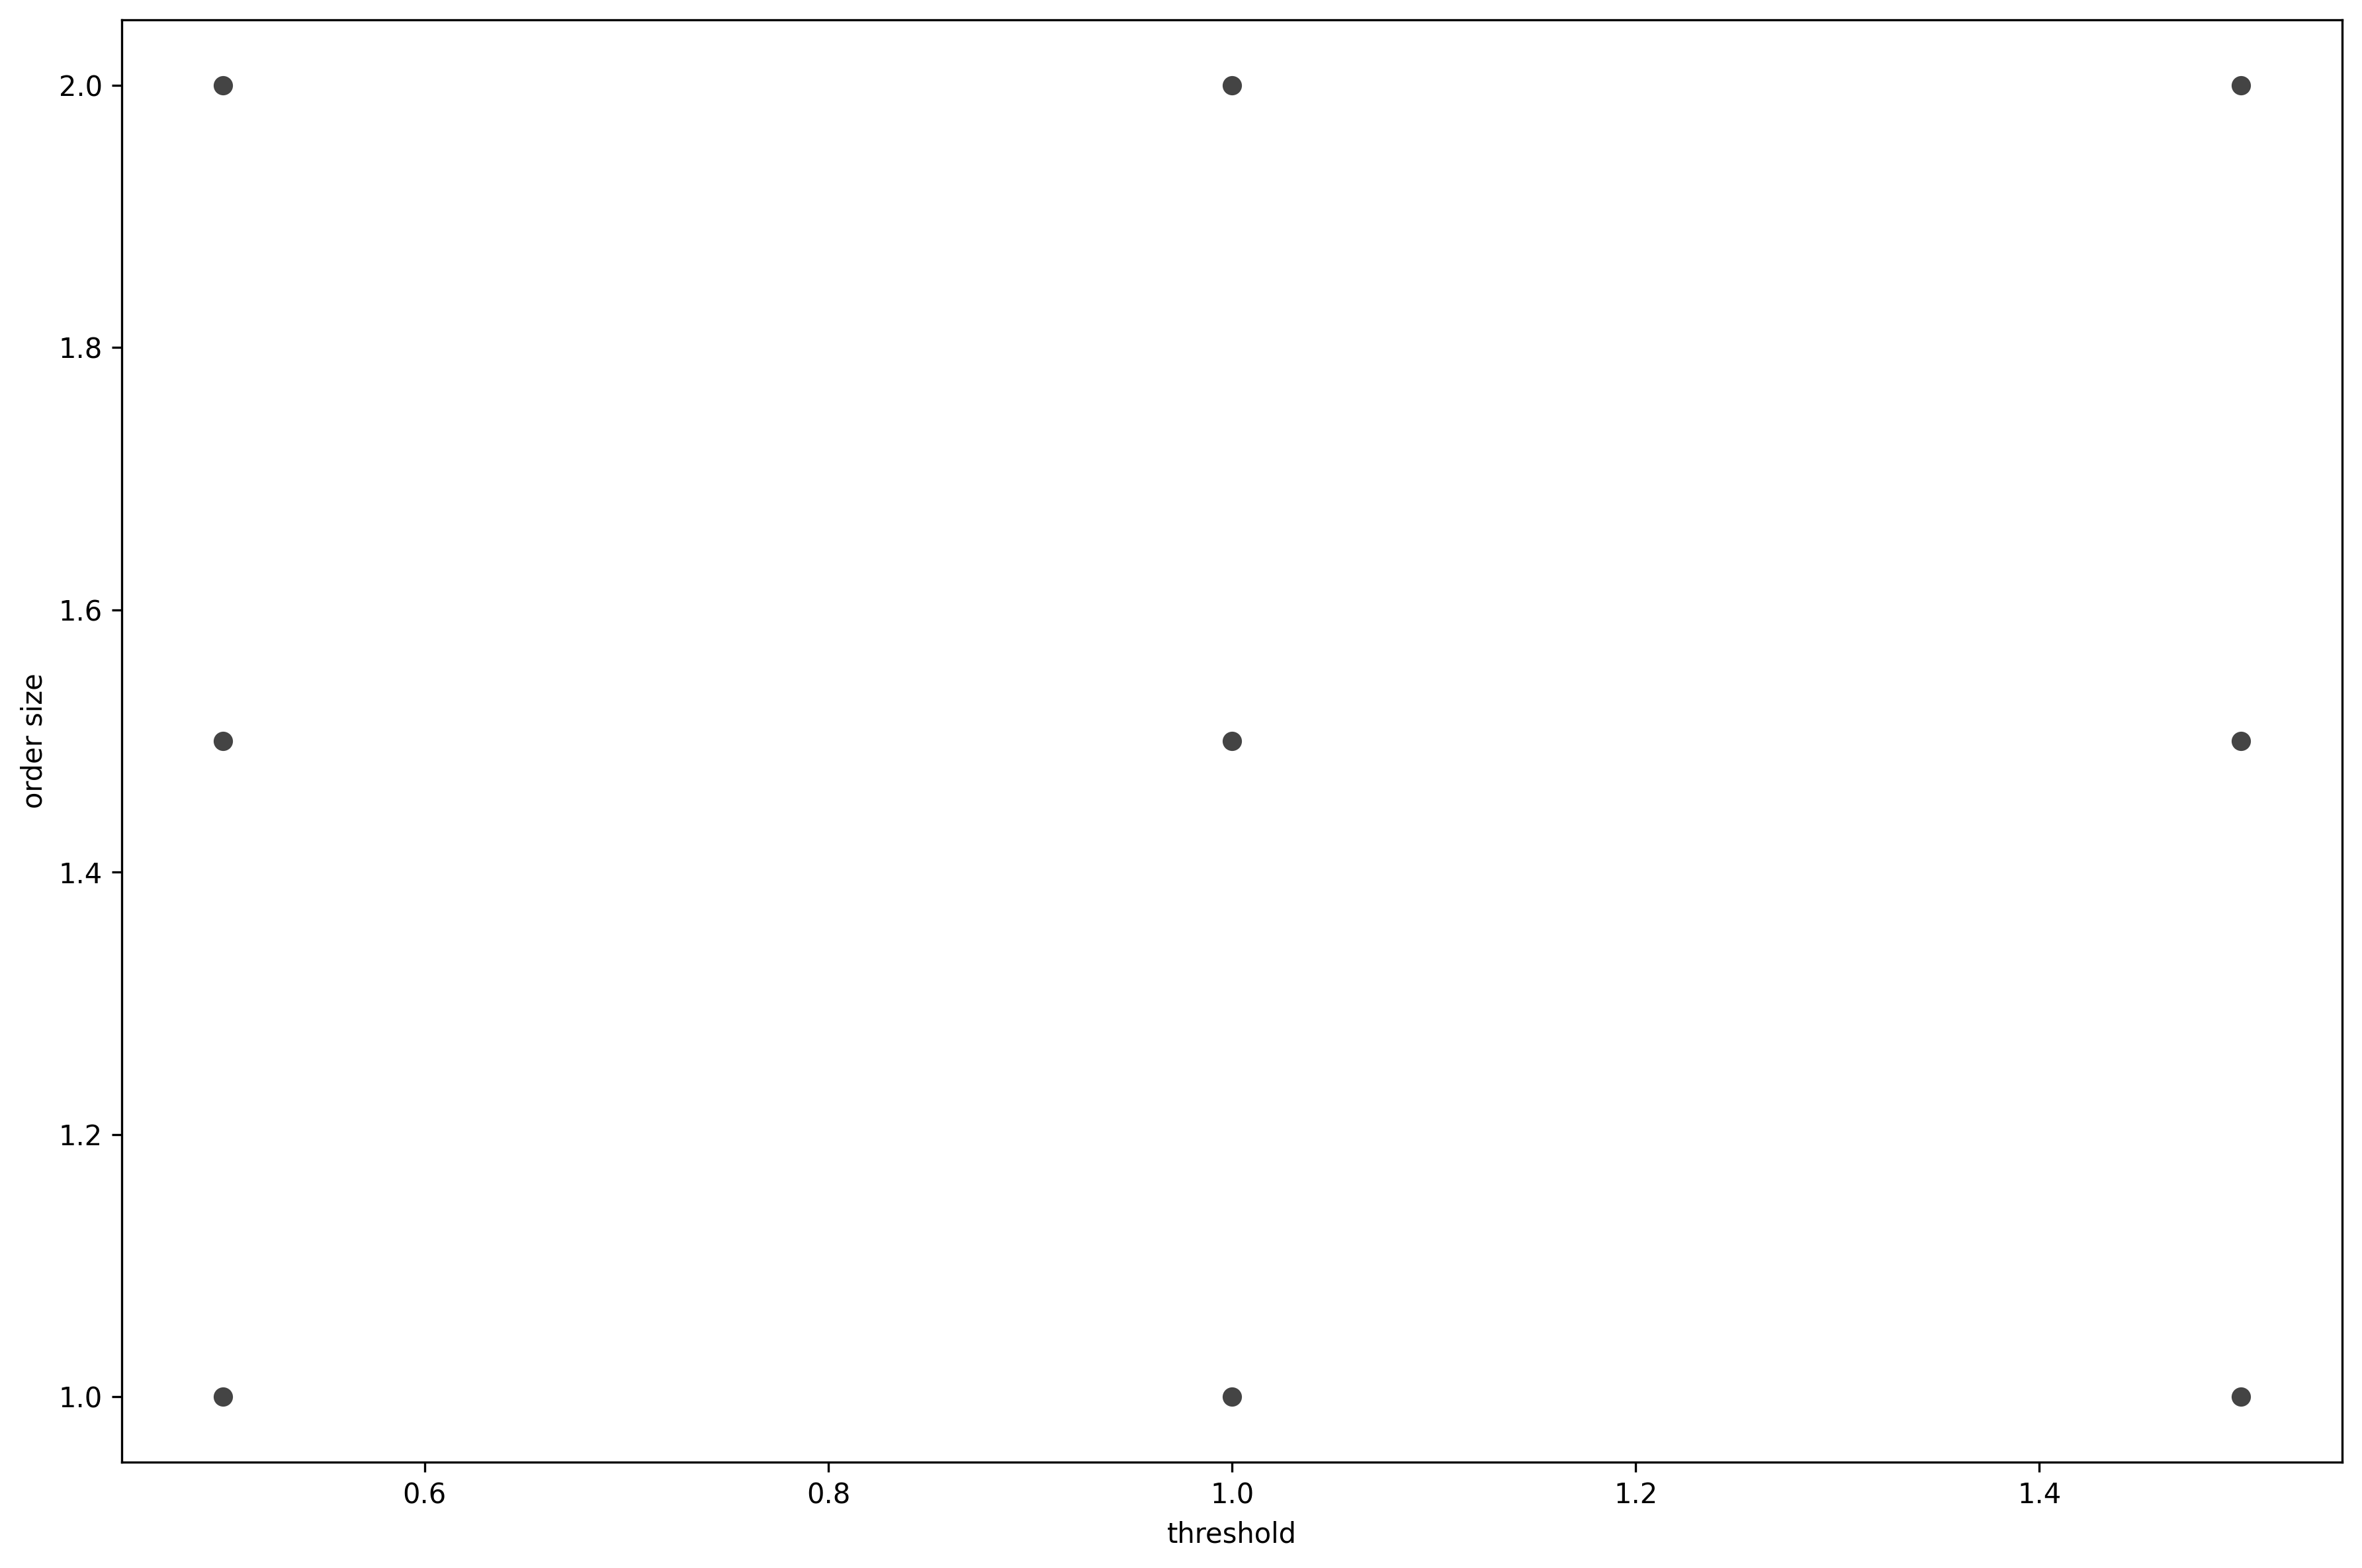

In [526]:
pp = np.array(parameters)         # convert the list of tuples into an ndarray
thresholds = pp[:,0]
order_sizes = pp[:,1]
plt.figure(figsize=(12,8))
plt.plot(thresholds, order_sizes, 'o', color=e4e.color_1)
plt.xlabel('threshold')
plt.ylabel('order size')
plt.tight_layout()
plt.show()

In [527]:
np.random.seed(17)
profit = np.array([markout_profit_2D(threshold=1, order_size=1) for _ in range(10000)]) # version 'A' pilot
i = np.where(profit !=0)[0]                         # non-zeros business metric
print(len(i), (len(profit) - len(i))/len(profit))  # 68.3% are zero business metric
print(profit.mean(), profit.std())  # aggregate measurement, standard deviation of individual measurement

3170 0.683
0.16538698838191251 1.1518836933467136


In [528]:
sd_delta = 1.2                                  
print("sd_delta = ", sd_delta, profit.std())    # standard deviation of delta from individual measurements 
prac_sig = 0.03
print("prac_sig = ", prac_sig, .2 * profit.mean()) # practical significance as percentage of prior experience
num_ind = (2.48 * sd_delta / prac_sig)**2   # num individual measurements when version 'B' is only one value
print("num_ind = ", num_ind)
num_ind = (3.08 * sd_delta / prac_sig)**2   # num individual measurements when version 'B' is two or more values
print("num_ind = ", num_ind)

sd_delta =  1.2 1.1518836933467136
prac_sig =  0.03 0.03307739767638251
num_ind =  9840.640000000001
num_ind =  15178.239999999998


#### Measure, analyze, and validate the 2D experiment

Measurement involves taking data points for each parameter option so that each option has at least the number indicated by A/B test design. In the code below, we track the number of parameters whose collected data reaches at least the required number using a set and array length check. We break when all parameter options are in the set, meaning they have all achieved the required number of data points.

The analysis stage analyzes the data collected. Here, we take the mean of each parameter options data, and calculate the delta. This delta needs to be converted to a standard normal from the null hypothesis, so that we can tell if its statistically significant enough to reject the null hypothesis. Since the expectation of the null hypothesis is 0, we only need the standard error of the delta to convert to standard normal. The standard error of the delta is related to the standard error of the aggregate measurements. So for each parameter option, we quantify the uncertainity around its aggregate measurement, using its standard error value,  by dividing the standard deviation of the individual measurements by the size of the individual measurements. Then after estimating the standard error of the delta from the standard error of the options, we convert the calculated delta between aggregated arguments to standard normal z-score, and compare it to the appropriate, significance level cdf. 

In the design stage, we estimate the standard deviation of the delta using the standard deviations of the options, and in the analysis stage, we estimate the standard error of the delta using the standard errors of the options.

In [529]:
def run_experiment_2D(num_ind, parameters):
    individual_measurements = {
        parameter: [] for parameter in parameters                   # tuples are hashable; parameter results
    }
    done = set()                                                    # using a set simplifies tracking
    while True:                                                     # first collect measurements
        parameter = parameters[np.random.choice(len(parameters))]   # randomize parameter combination choice
        threshold, order_size = parameter                           # unpack parameter combination
        profit = markout_profit_2D(threshold, order_size)           # get markout profit of combination
        individual_measurements[parameter].append(profit)           # store measurement
        if (len(individual_measurements[parameter]) >= num_ind):    # enough measurement for combination
            done.add(parameter)                                     # store combinations with enough points
        if len(done) == len(individual_measurements):               # if all combinations have enough points
            break 
                                                                    # second expectation, standard error calc
    aggregate_measurements = []                                     # list of aggregate for each combination
    standard_errors = []                                            # standard errors of aggregates
    for parameter in parameters:                                    # loop through list of parameters
        ims = np.array(individual_measurements[parameter])          # access combination measurements
        aggregate_measurements.append(ims.mean())                   # calculate aggregate, mu_A, mu_B
        standard_errors.append(ims.std()/np.sqrt(len(ims)))         # standard error of aggregate se_A, se_B    
    return aggregate_measurements, standard_errors

In [530]:
np.random.seed(17)
parameters = design_ccd(thresholds=[0.5, 1.0, 1.5], order_sizes=[1, 1.5, 2])
aggregate_measurements, standard_errors = run_experiment_2D(15000, parameters)

In [531]:
np.array(aggregate_measurements).max()

0.31338903445064126

In [532]:
def _plot_aggregate_measurements(parameters, aggregate_measurements, standard_errors):
    n = np.arange(len(parameters))
    plt.figure(figsize=(12,8))
    plt.errorbar(n, aggregate_measurements,
                 yerr=standard_errors,
                 fmt='o', color=e4e.color_1, capsize=10)
    plt.ylabel('Markout profit', fontsize=e4e.font_size_2d)
    plt.yticks(fontsize=e4e.font_size_2d)
    plt.xticks(
        ticks = list(range(len(parameters))),
        labels = [f"th={p[0]:.1f}\nos={p[1]:.1f}" for p in parameters],
        fontsize=e4e.font_size_2d
    )

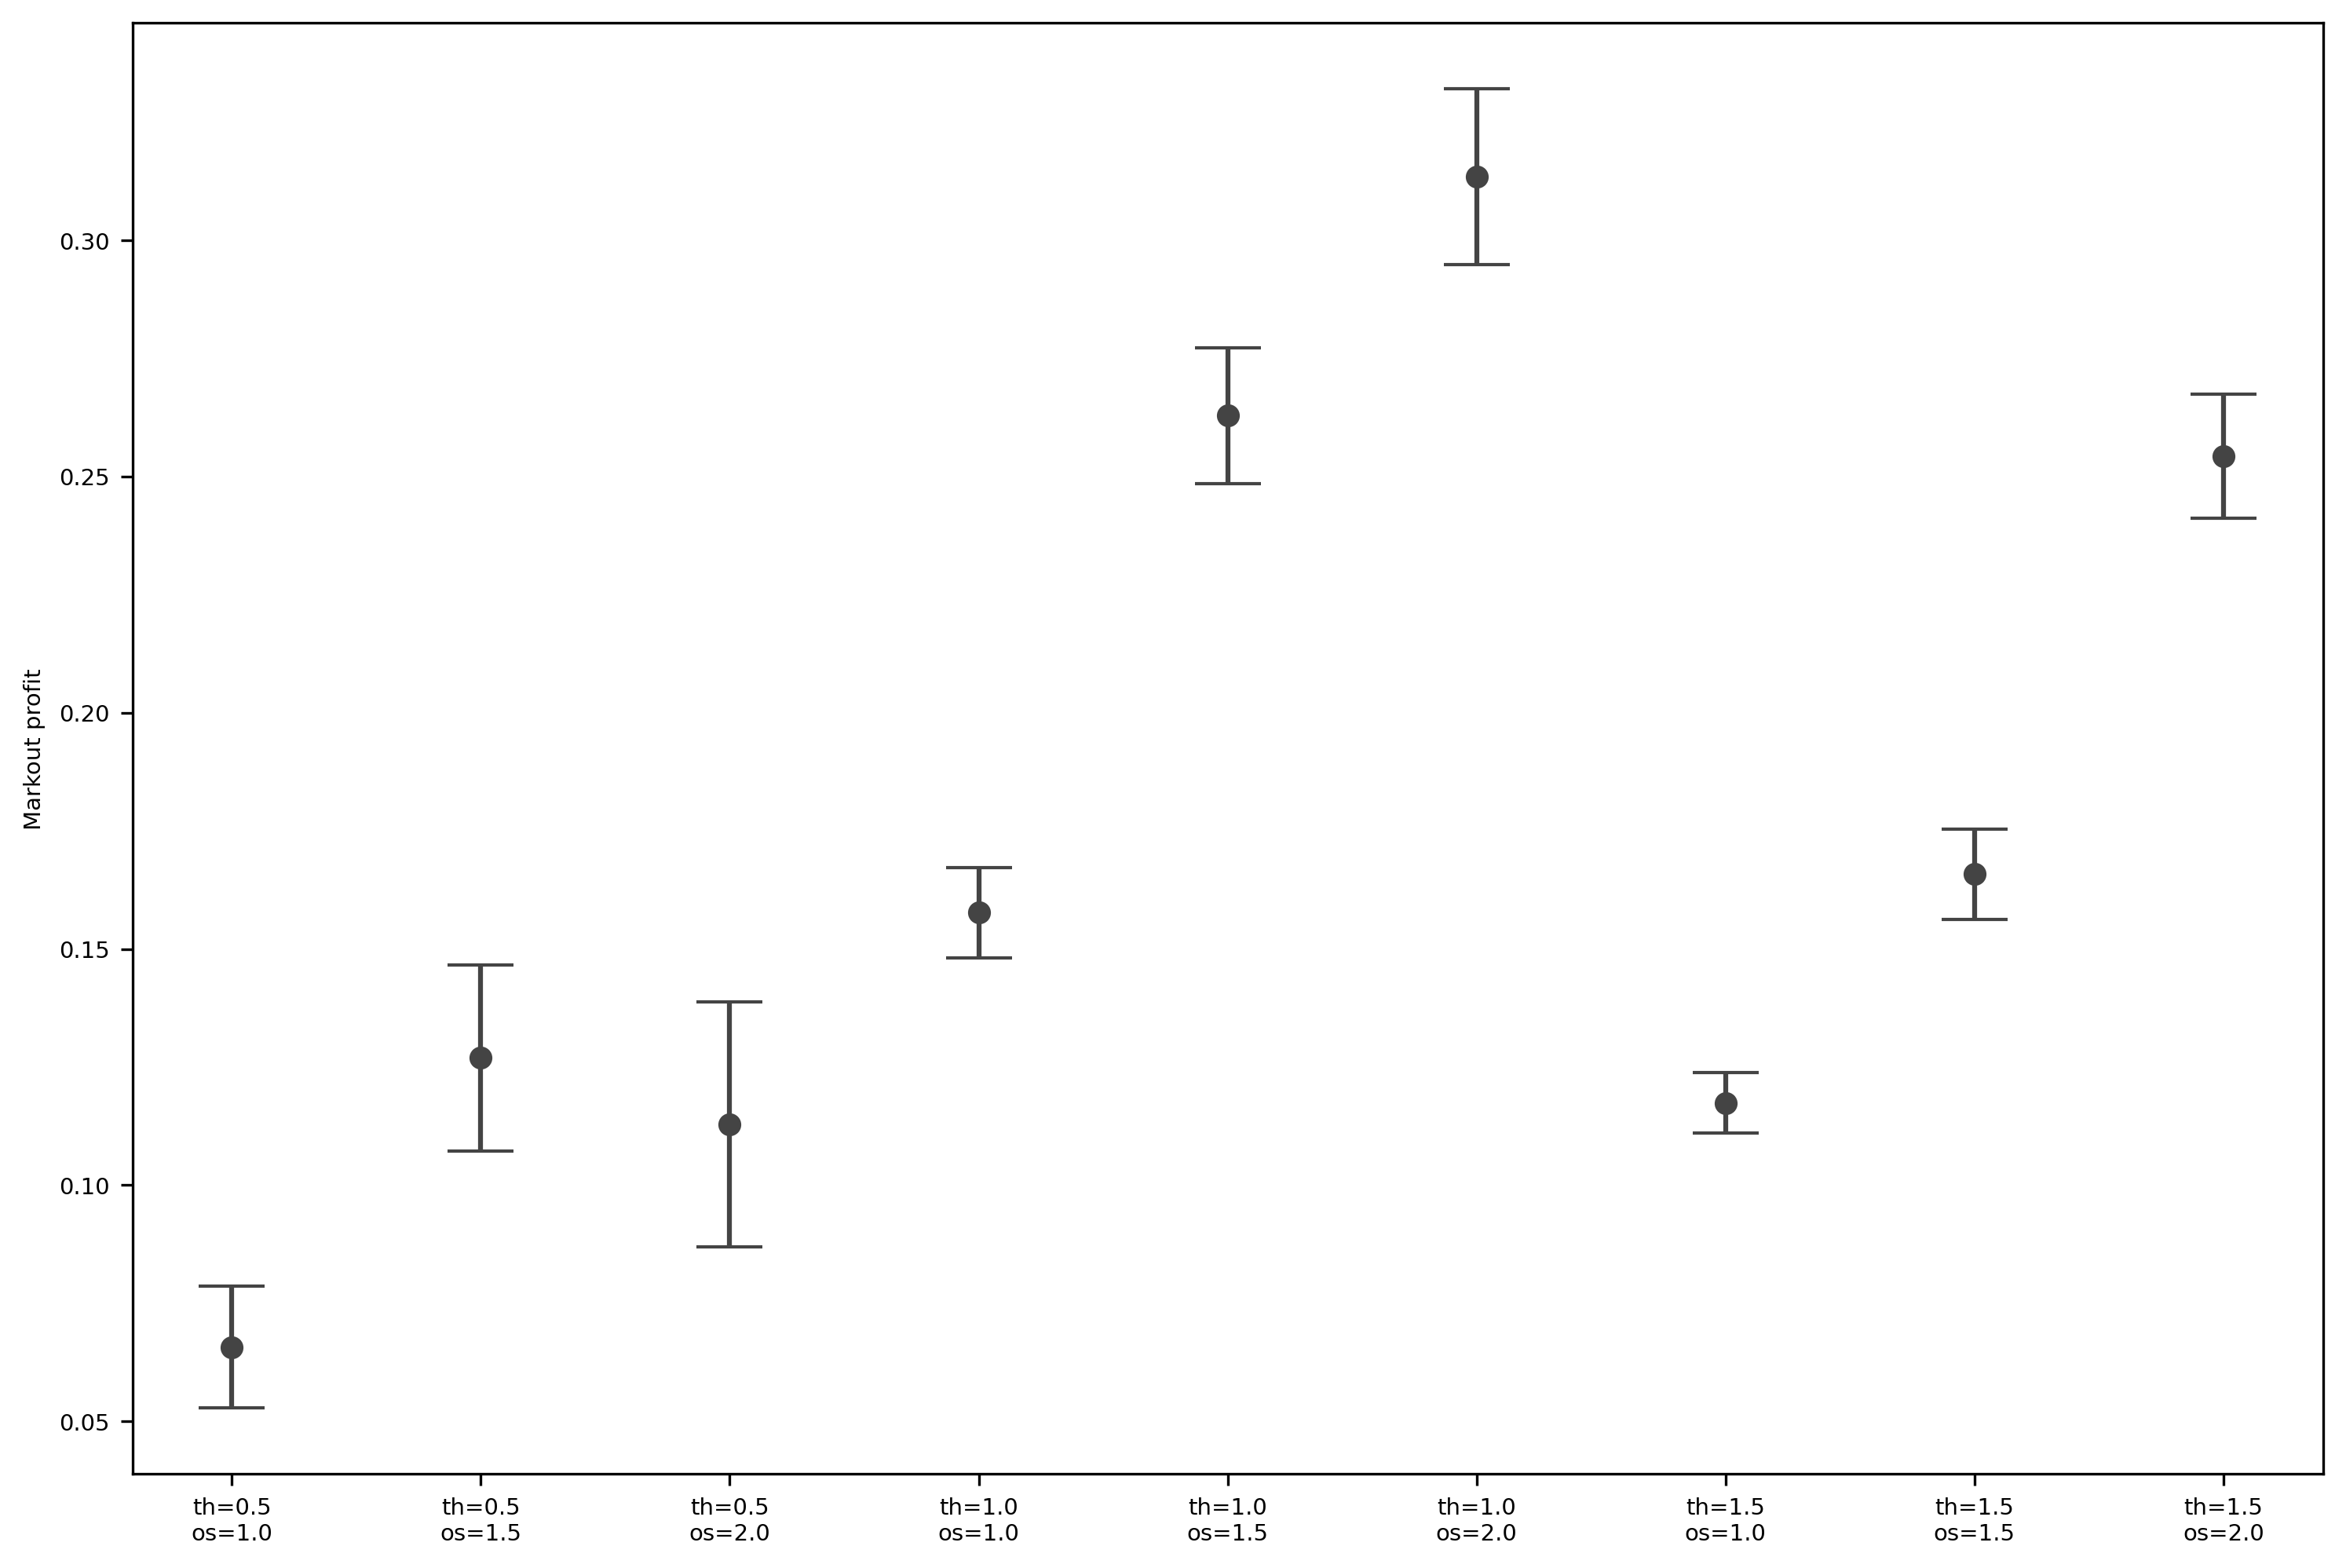

In [533]:
_plot_aggregate_measurements(parameters, aggregate_measurements, standard_errors)
plt.show()

#### Analyze the experiment

The next stage of response surface methodology is the use of a surrogate function to model the relationship between the continuous-valued parameters and the business metric. Below, a quadratic linear function with univariate quadratic terms (eg $x_1^2$) and cross quadratic terms (eg $x_1x_2$) of the the parameter options is used. The weights were obtained analytically using the normal equations.

$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_1^2+\beta_4x_2^2+\beta_5x_1x_2+\epsilon$

constant = $\beta_0$

linear terms = $\beta_1x_1+\beta_2x_2$

univariate quadratic terms = $\beta_3x_1^2+\beta_4x_2^2$ models a maximum between the edges of the box

cross quadratic term = $\beta_5x_1x_2$  this models behavior along the diagonals of the experiment design

error term = $\epsilon$


After the weights of the quadratic function are obtained, the next stage involves interpolation of the response function to obtained estimate business metric values for parameters that were not measured. The most optimal estimate's parameter combination is chosen.



In [534]:
# Linear regression for two parameters
def linear_regression_2D(parameters, aggregate_measurements):
    parameters = np.array(parameters)       # numpy array for easy access of x0 and x1
    x0 = parameters[:,0]                    # parameter 1, threshold
    x1 = parameters[:,1]                    # parameter 2, order size
    y = aggregate_measurements              # aggregate measurements of each parameter combination
    X = np.array([np.ones(len(y)), x0, x1, x0**2, x1**2, x0*x1]).T  # vectorized parameters' quadratic statement
    beta = np.linalg.inv(X.T @ X) @ (X.T @ y)   # solution to linear regression using normal equations
    return beta

In [535]:
beta = linear_regression_2D(parameters, aggregate_measurements)

In [536]:
# Surrogate function for two parameters
def interpolate_2D(parameters, beta):
    parameters = np.array(parameters)                           # convert from list to ndarray for calculations
    x0_values = np.arange(parameters[:,0].min(),
                         parameters[:,0].max()+1e-6, 0.01)      # range of values of parameter 1 (closed range)
    x1_values = np.arange(parameters[:,1].min(),
                          parameters[:,1].max()+1e-6, 0.01)     # range of values of parameter 2 (closed range)
    x0hat_2d, x1hat_2d = np.meshgrid(x0_values, x1_values)      # get two 2d meshgrids over which to interpolate
    x0hat = x0hat_2d.flatten()              # flatten to 1D
    x1hat = x1hat_2d.flatten()          
    XHat = np.array([np.ones(len(x0hat)),
                     x0hat,                 # stack x0hat and x1hat so they make all unique pairs
                     x1hat,
                     x0hat**2,
                     x1hat**2,
                     x0hat*x1hat]).T        # pack 1D values and their combinations into matrix
    yhat = XHat @ beta                      # use linear regression weights to determine y
    yhat_2d  = np.reshape(yhat, (len(x1_values), len(x0_values)))   # estimated values of y (business metric)
    return x0hat_2d, x1hat_2d, yhat_2d   # all same shape

In [537]:
def _plot_interpolation(parameters, aggregate_measurements, beta, parameter_opt=None):
    parameters = np.array(parameters)
    thresholds = parameters[:,0].copy()
    order_sizes = parameters[:,1].copy()
    # Hack to expand plot just enough to show full dots
    g = 0.025
    parameters[0,0] = parameters[0,0]-g
    parameters[0,1] = parameters[0,1]-g
    parameters[-1,0] = parameters[-1,0]+g 
    parameters[-1,1] = parameters[-1,1]+g 
    import time 
    t0 = time.time()
    x0hat, x1hat, yhat = interpolate_2D(parameters,beta)
    tf = time.time()        # time it takes to make all these 2D interpolations compared to measurements
    print(tf-t0)            # milliseconds to generate interpolations
    plt.figure(figsize=(12,8))
    plt.contourf(x0hat, x1hat, yhat, alpha=.5, cmap='viridis')  # contour plot for interpolated points
    plt.plot(thresholds, order_sizes, 'o', 
             color=e4e.color_1, label='measured parameters')   # plot the measured points on contour plot
    plt.colorbar()
    plt.title('markout_profit')

    if parameter_opt is not None:
        threshold_opt = parameter_opt[0]
        order_size_opt = parameter_opt[1]
        plt.plot(threshold_opt, order_size_opt, 'X', 
                 color=e4e.color_1, markersize=10, label='optimal parameters')
    
    plt.xlabel('threshold')
    plt.ylabel('order size')
    plt.legend()

0.011276006698608398


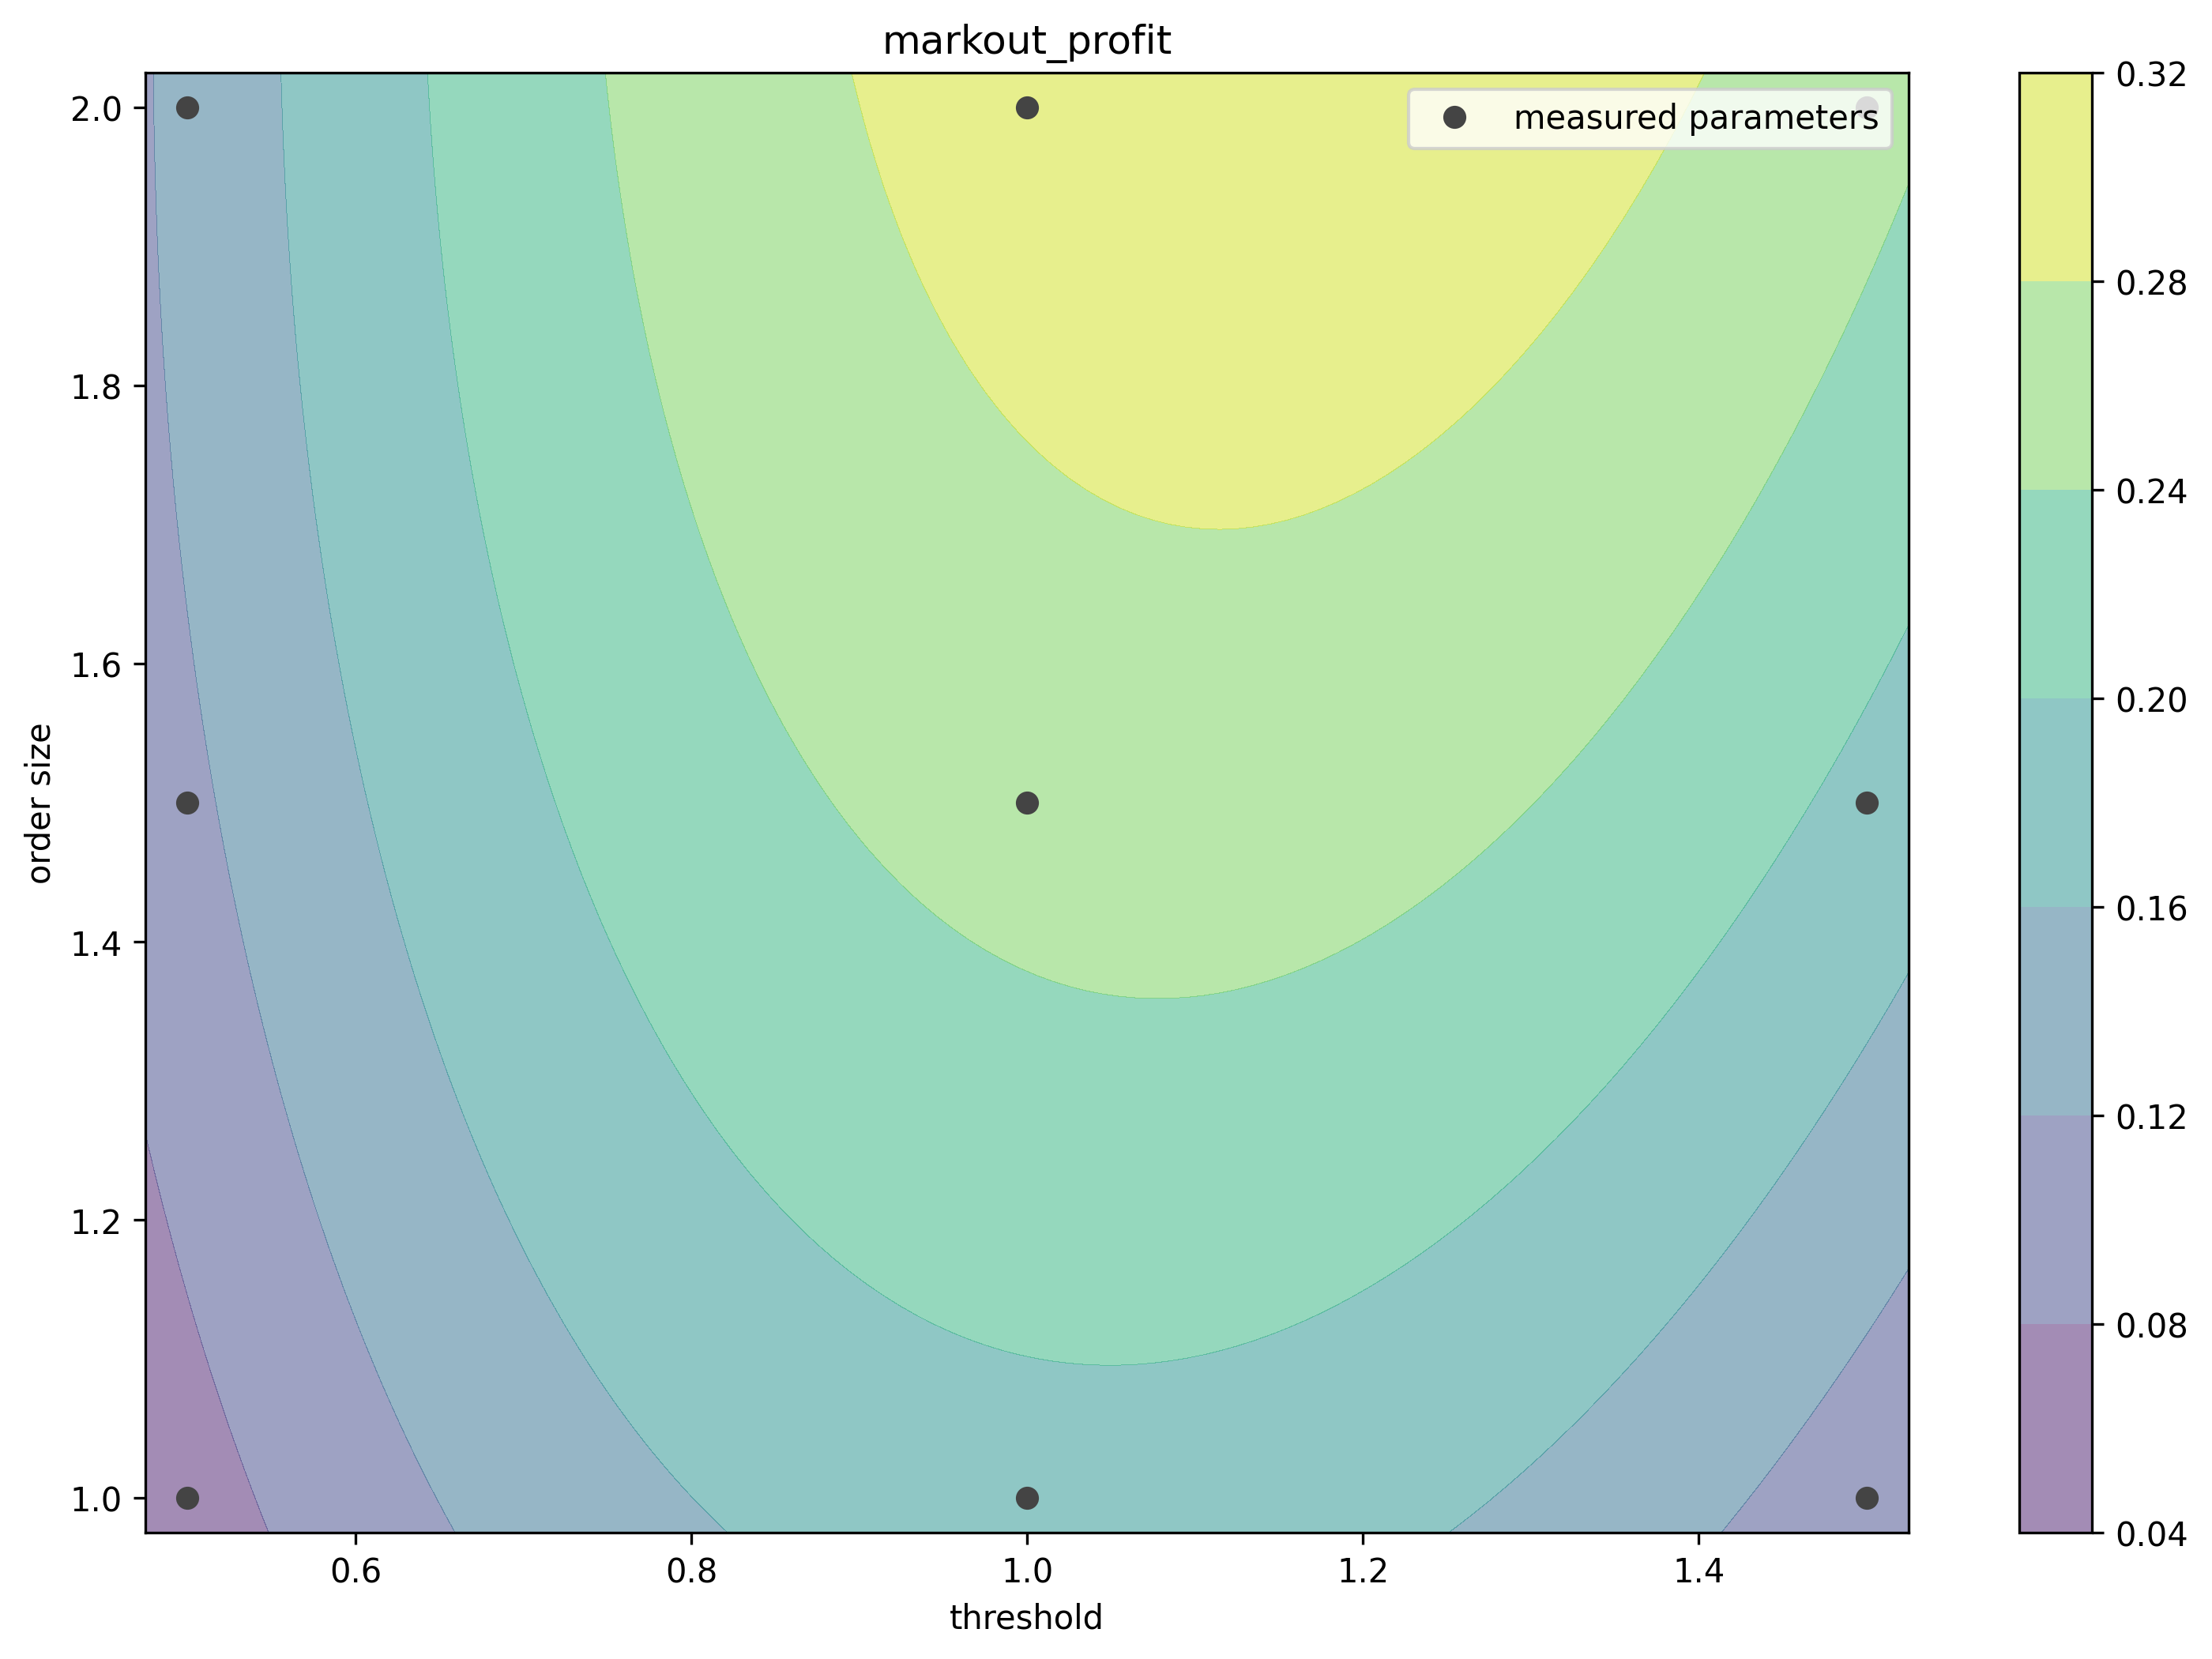

In [538]:
_plot_interpolation(parameters, aggregate_measurements, beta)
plt.show()

In [539]:
def optimize_2D(parameters, beta):
    x0hat, x1hat, yhat = interpolate_2D(parameters, beta)   # grids fof values
    i = np.where(yhat == yhat.max())                # locate maximum element of interpolated business metric
    return x0hat[i][0], x1hat[i][0], yhat[i][0]     # return optimal parameters and estimated markout profit

In [540]:
threshold_opt, order_size_opt, estimated_max_profit = optimize_2D(parameters, beta)
print(threshold_opt, order_size_opt, estimated_max_profit)

1.1500000000000006 2.000000000000001 0.3052390933153081


0.009803056716918945


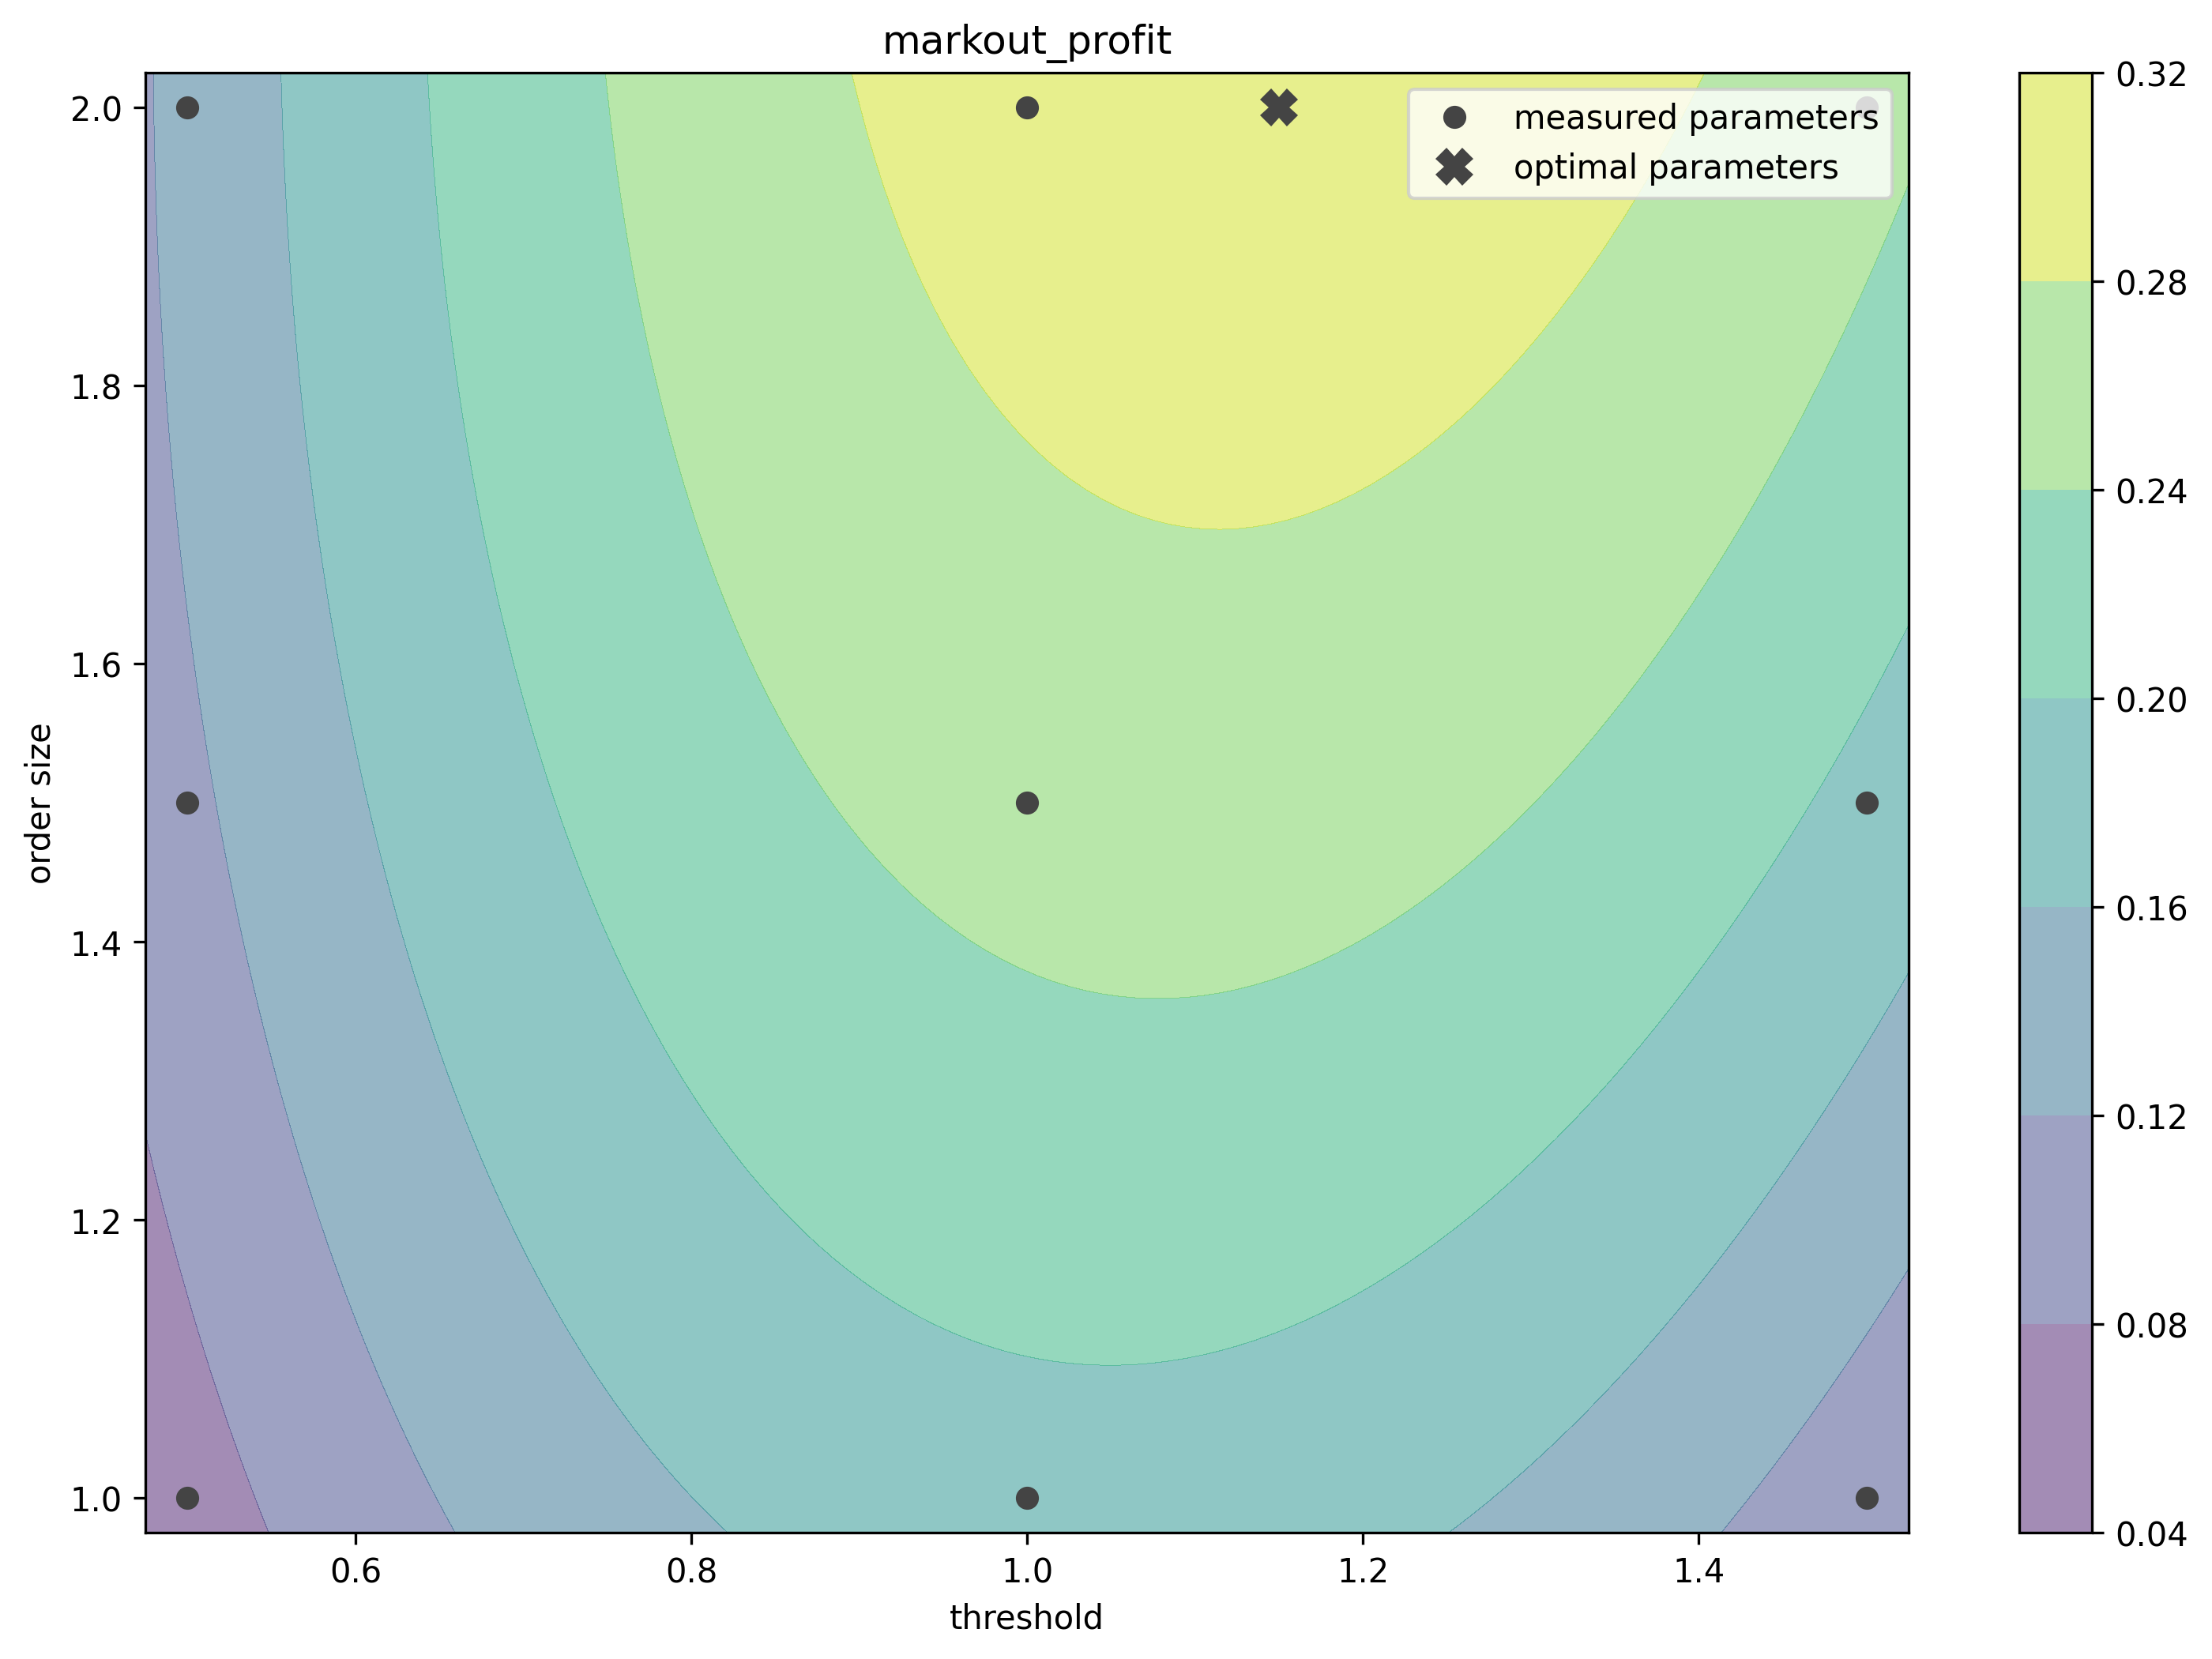

In [541]:
_plot_interpolation(parameters, aggregate_measurements, beta, [threshold_opt, order_size_opt])
plt.show()

In [542]:
x0hat, x1hat, yhat = interpolate_2D(parameters,beta)

In [543]:
yhat.min(), yhat.max()      # range of estimated markout profit 

(0.06261620730538324, 0.3052390933153081)

0.4105063923898157


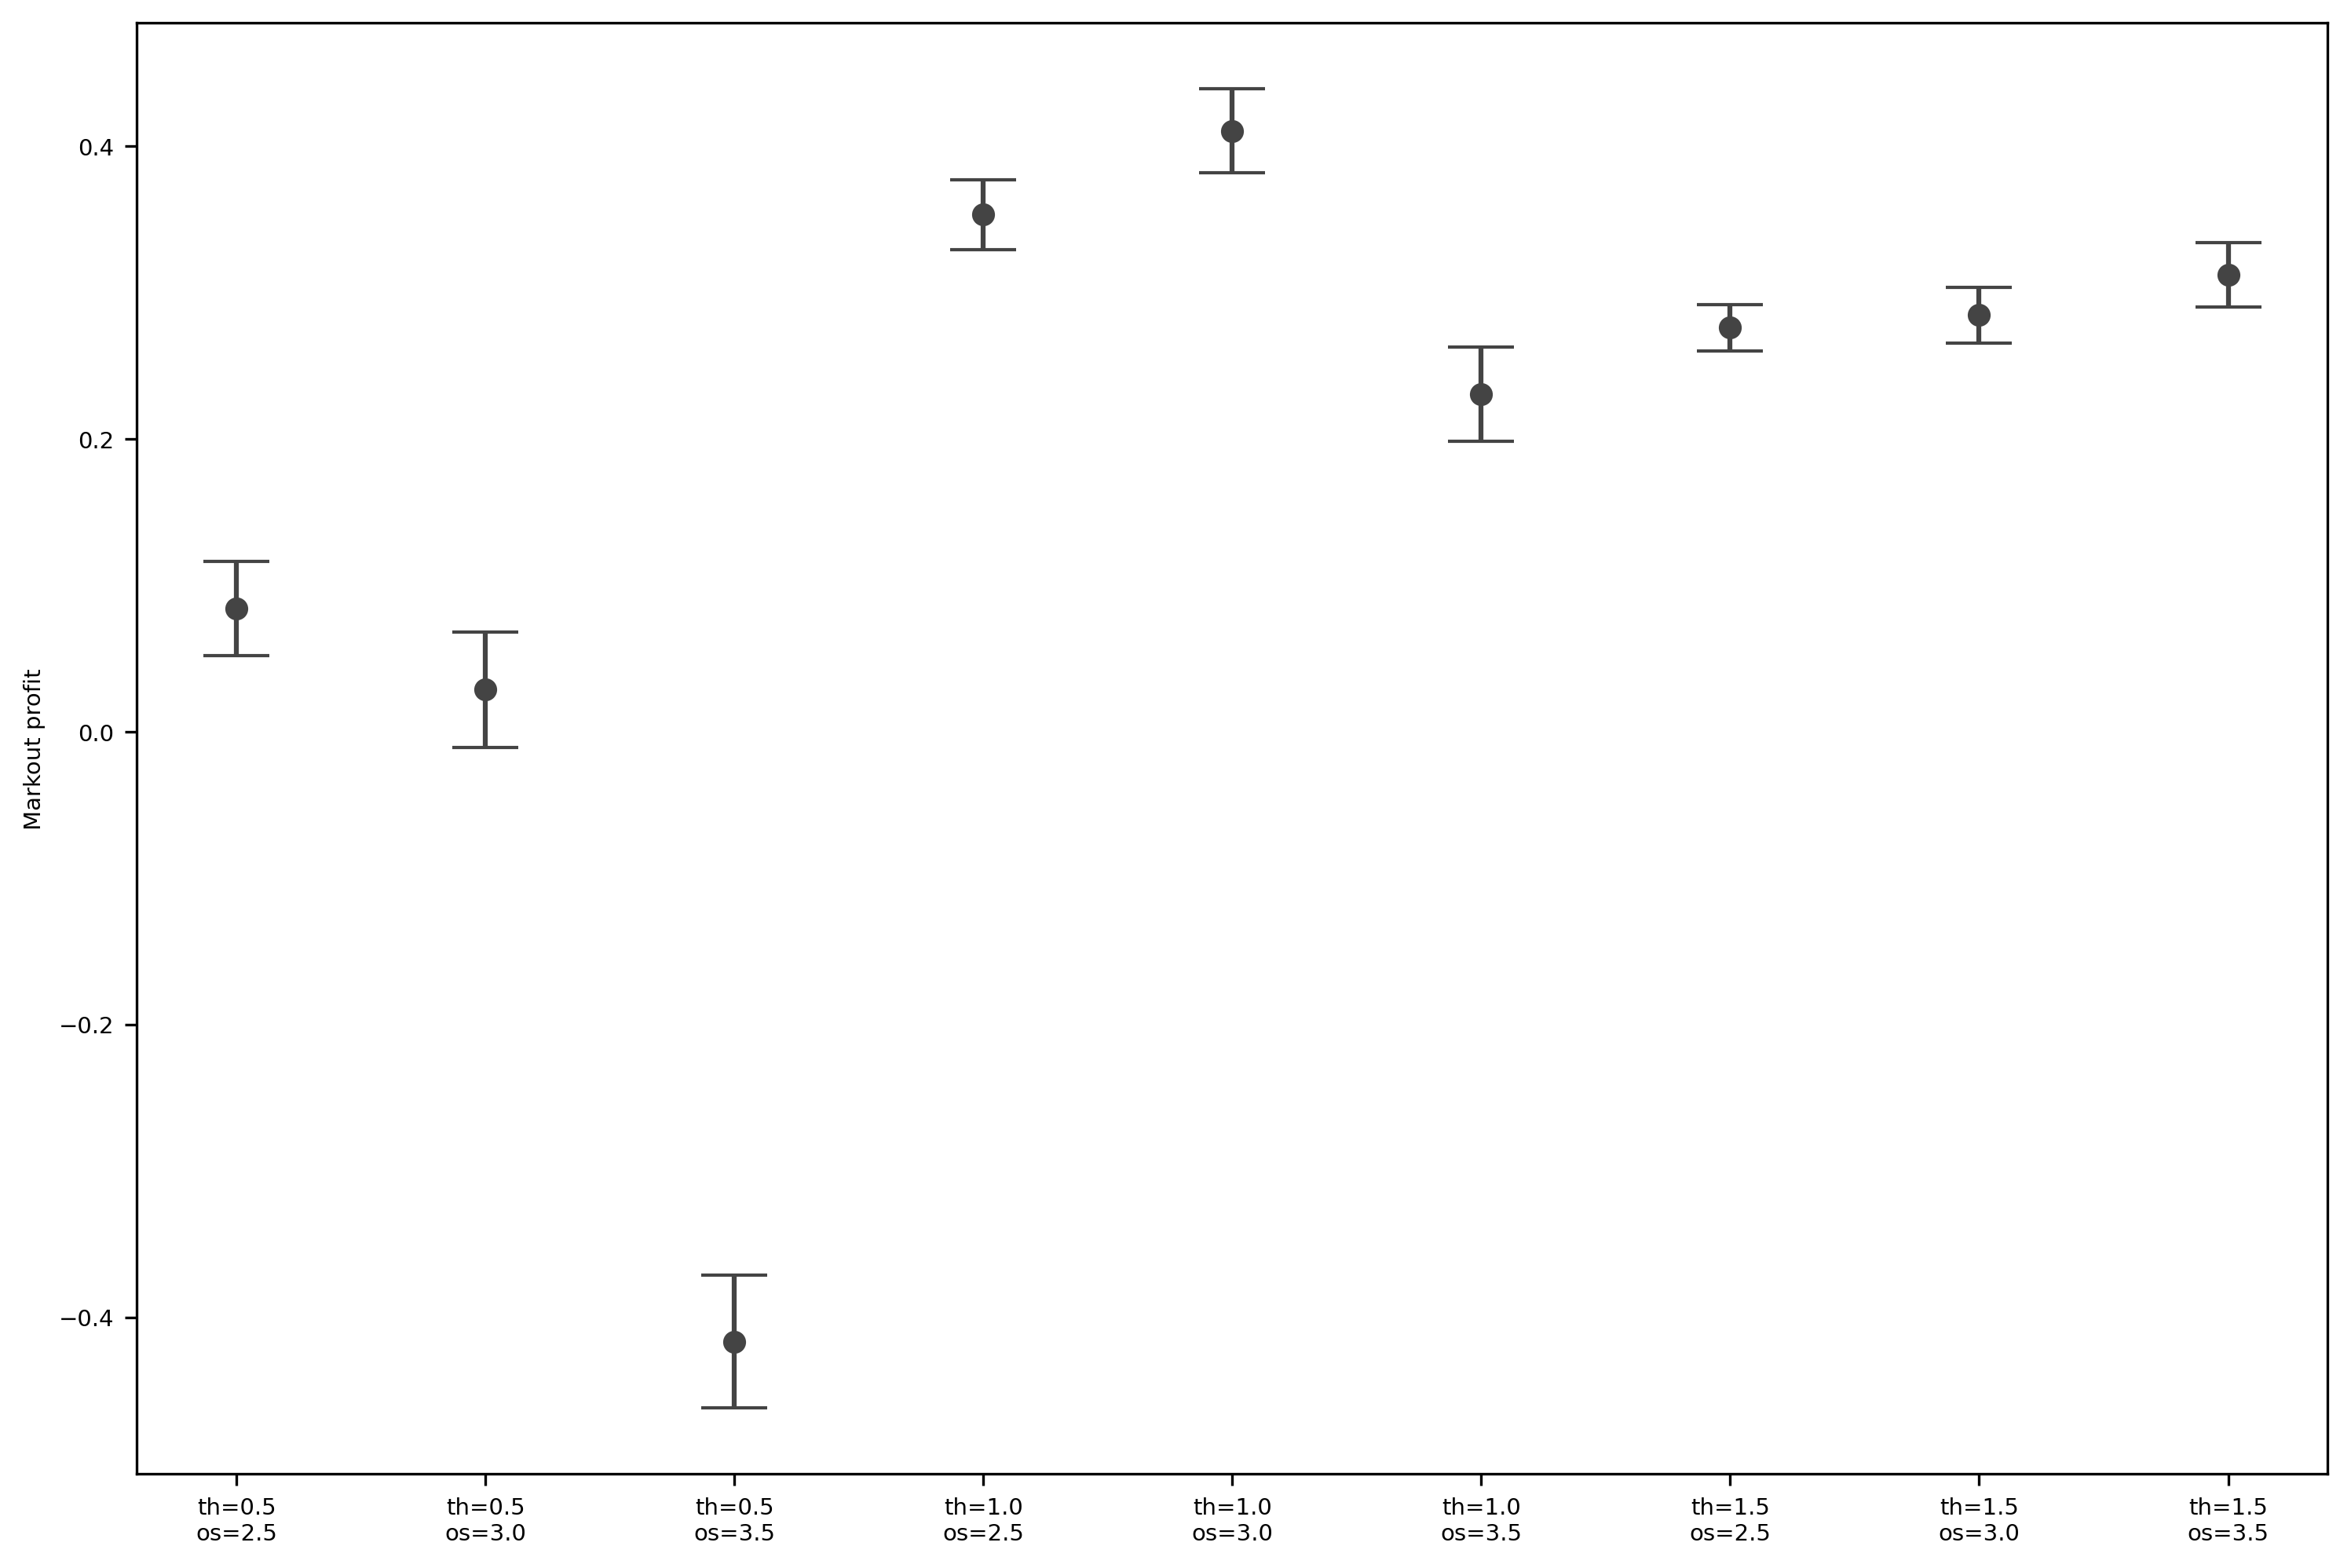

In [544]:
# Redesign the experiment to see if optimum lies outside initial box
parameters = design_ccd(thresholds=[0.5, 1.0, 1.5], 
                        order_sizes=[2.5, 3.0, 3.5]) # new order sizes to be measured
np.random.seed(17)
aggregate_measurements, standard_errors = run_experiment_2D(15000, parameters)
print(np.array(aggregate_measurements).max())
_plot_aggregate_measurements(parameters, aggregate_measurements, standard_errors)

In [545]:
# Analyze the results
beta = linear_regression_2D(parameters, aggregate_measurements)
threshold_opt, order_size_opt, estimated_max_profit = optimize_2D(parameters, beta)
print(threshold_opt, order_size_opt, estimated_max_profit)

1.1700000000000006 2.869999999999992 0.445119726333389


0.008154153823852539


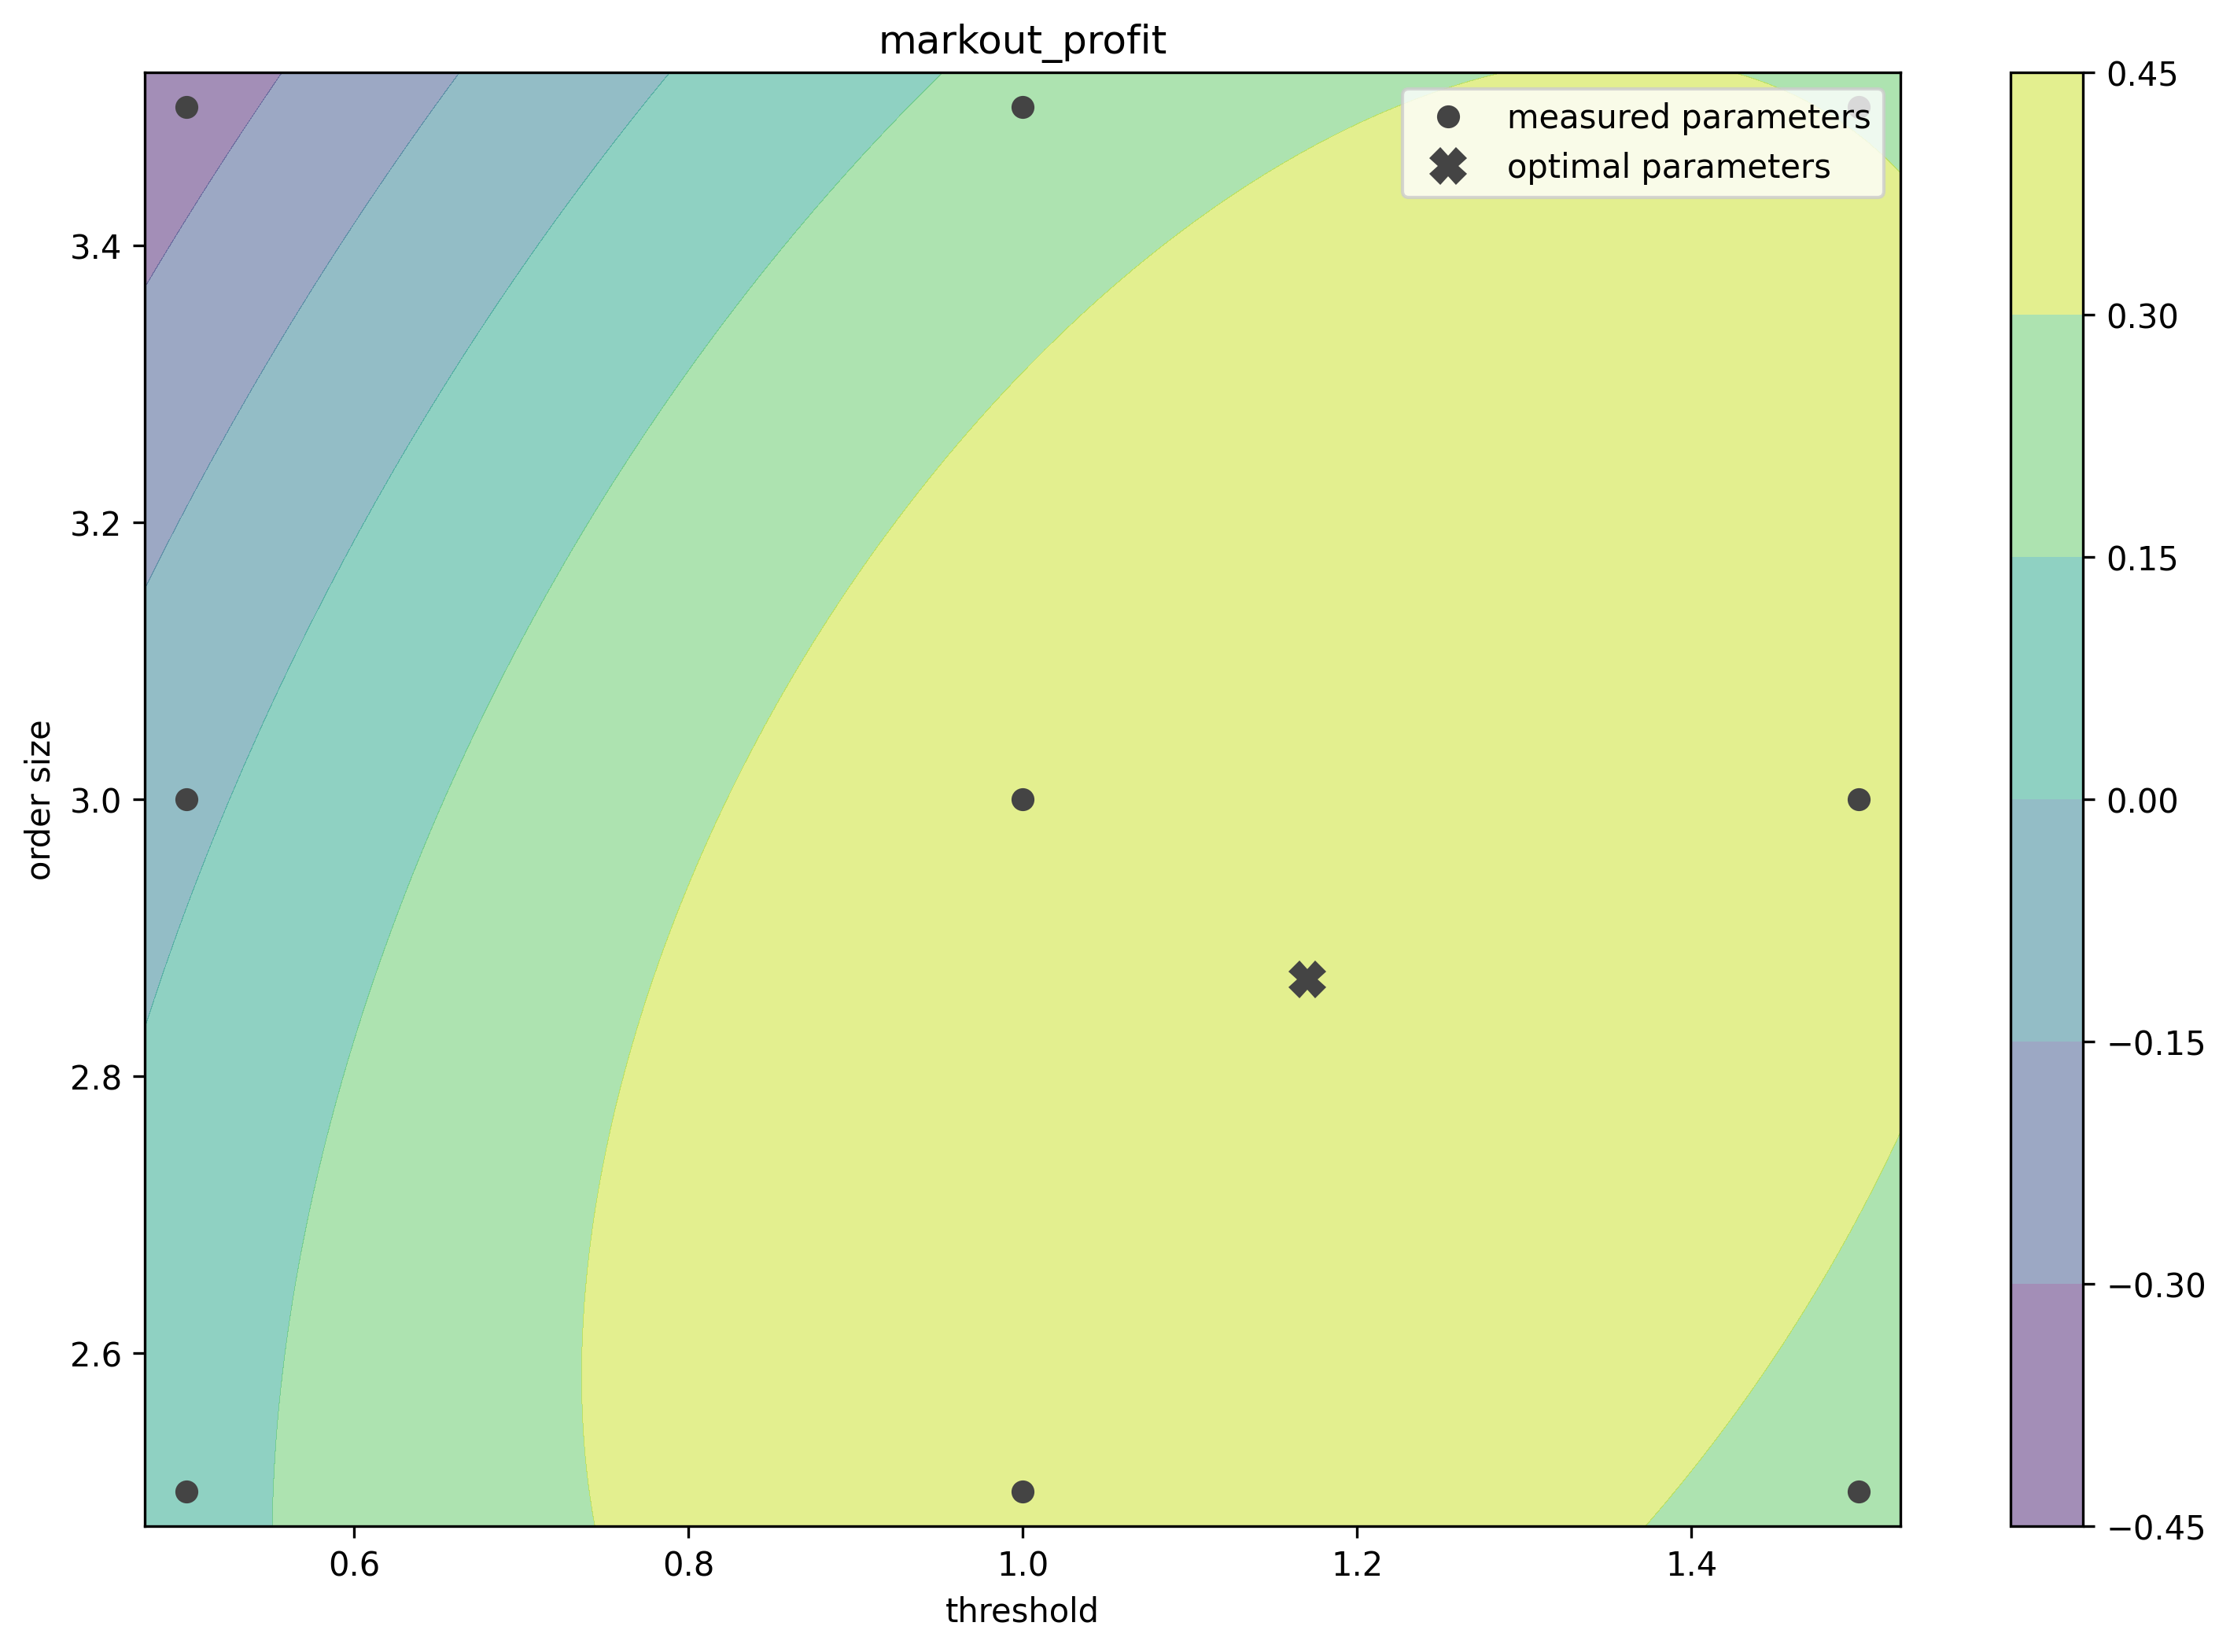

In [546]:
_plot_interpolation(parameters, aggregate_measurements, beta, [threshold_opt, order_size_opt])
plt.show()      # outlier value at threshold = 0.5, order size = 3.5

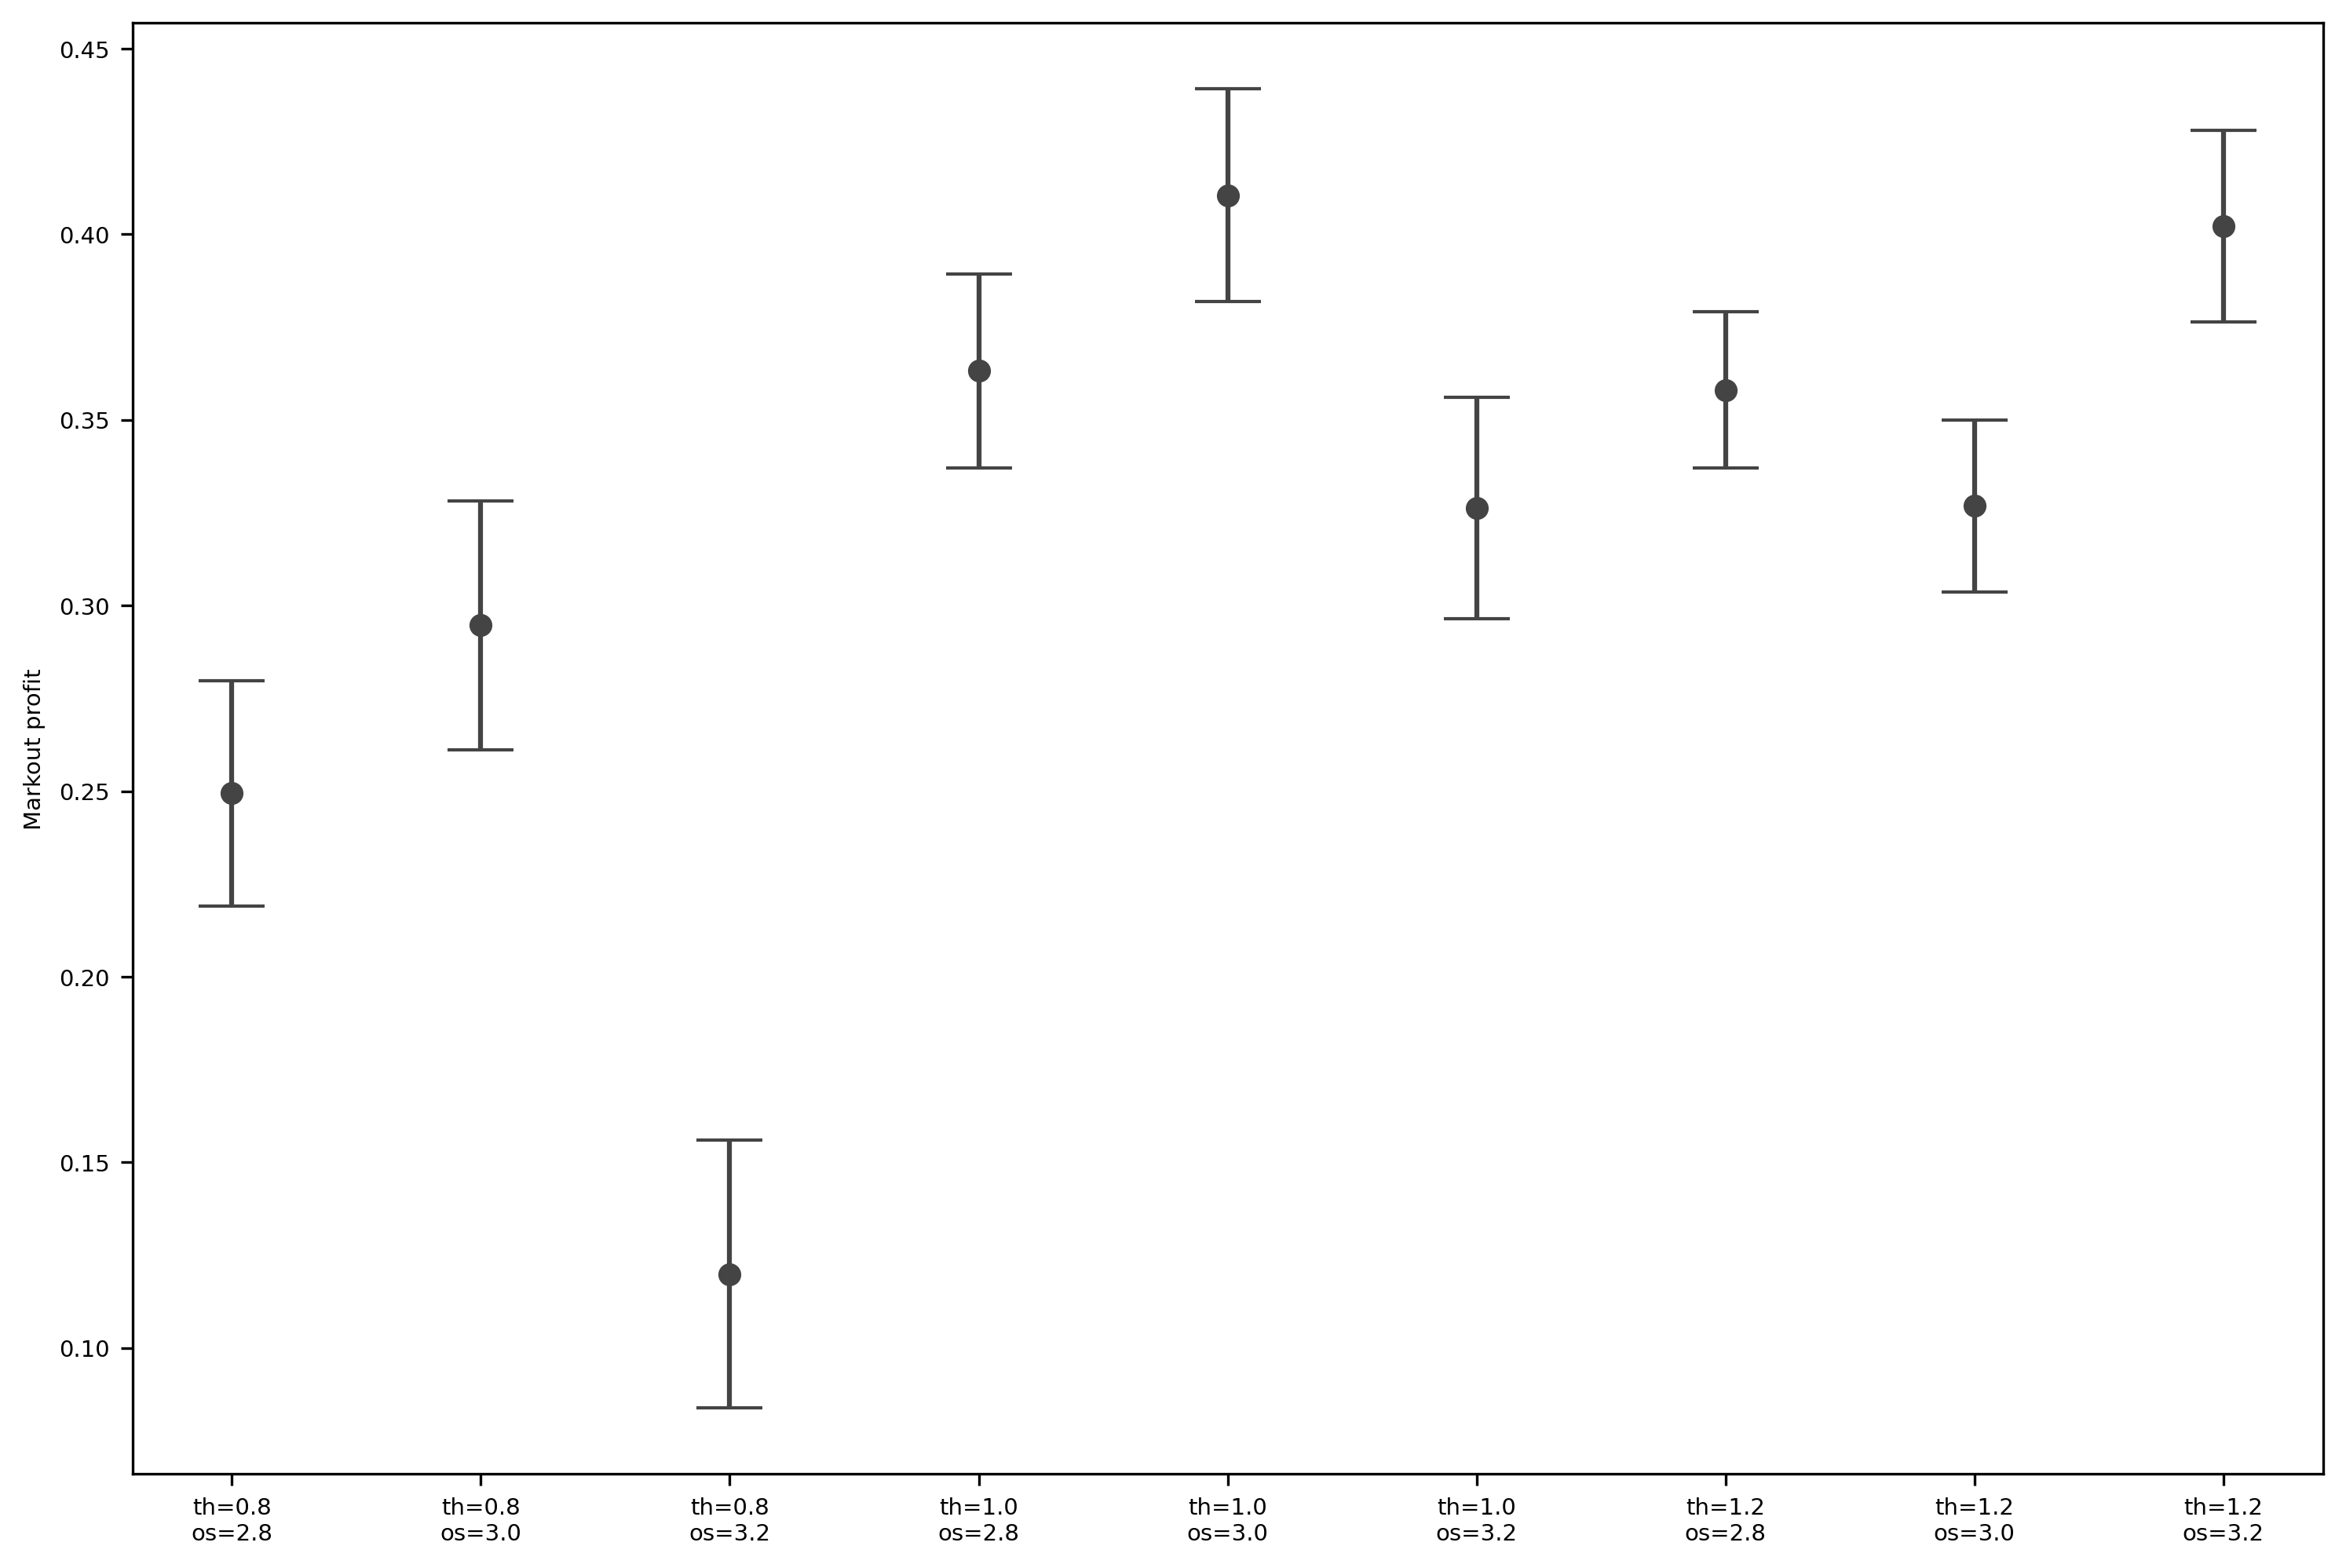

In [547]:
# Shrinking parameter ranges due to outlier loss at threshold=0.5 order_size=3.5 (markout profit=-0.4)
parameters = design_ccd(thresholds=[.75, 1.0, 1.25],        # shrink threshold values
                        order_sizes=[2.75, 3.0, 3.25])      # shrink order size values
np.random.seed(17)
aggregate_measurements, standard_errors = run_experiment_2D(15000, parameters)
_plot_aggregate_measurements(parameters, aggregate_measurements, standard_errors)

1.1200000000000003 2.9999999999999947 0.4104963255520558
0.01129603385925293


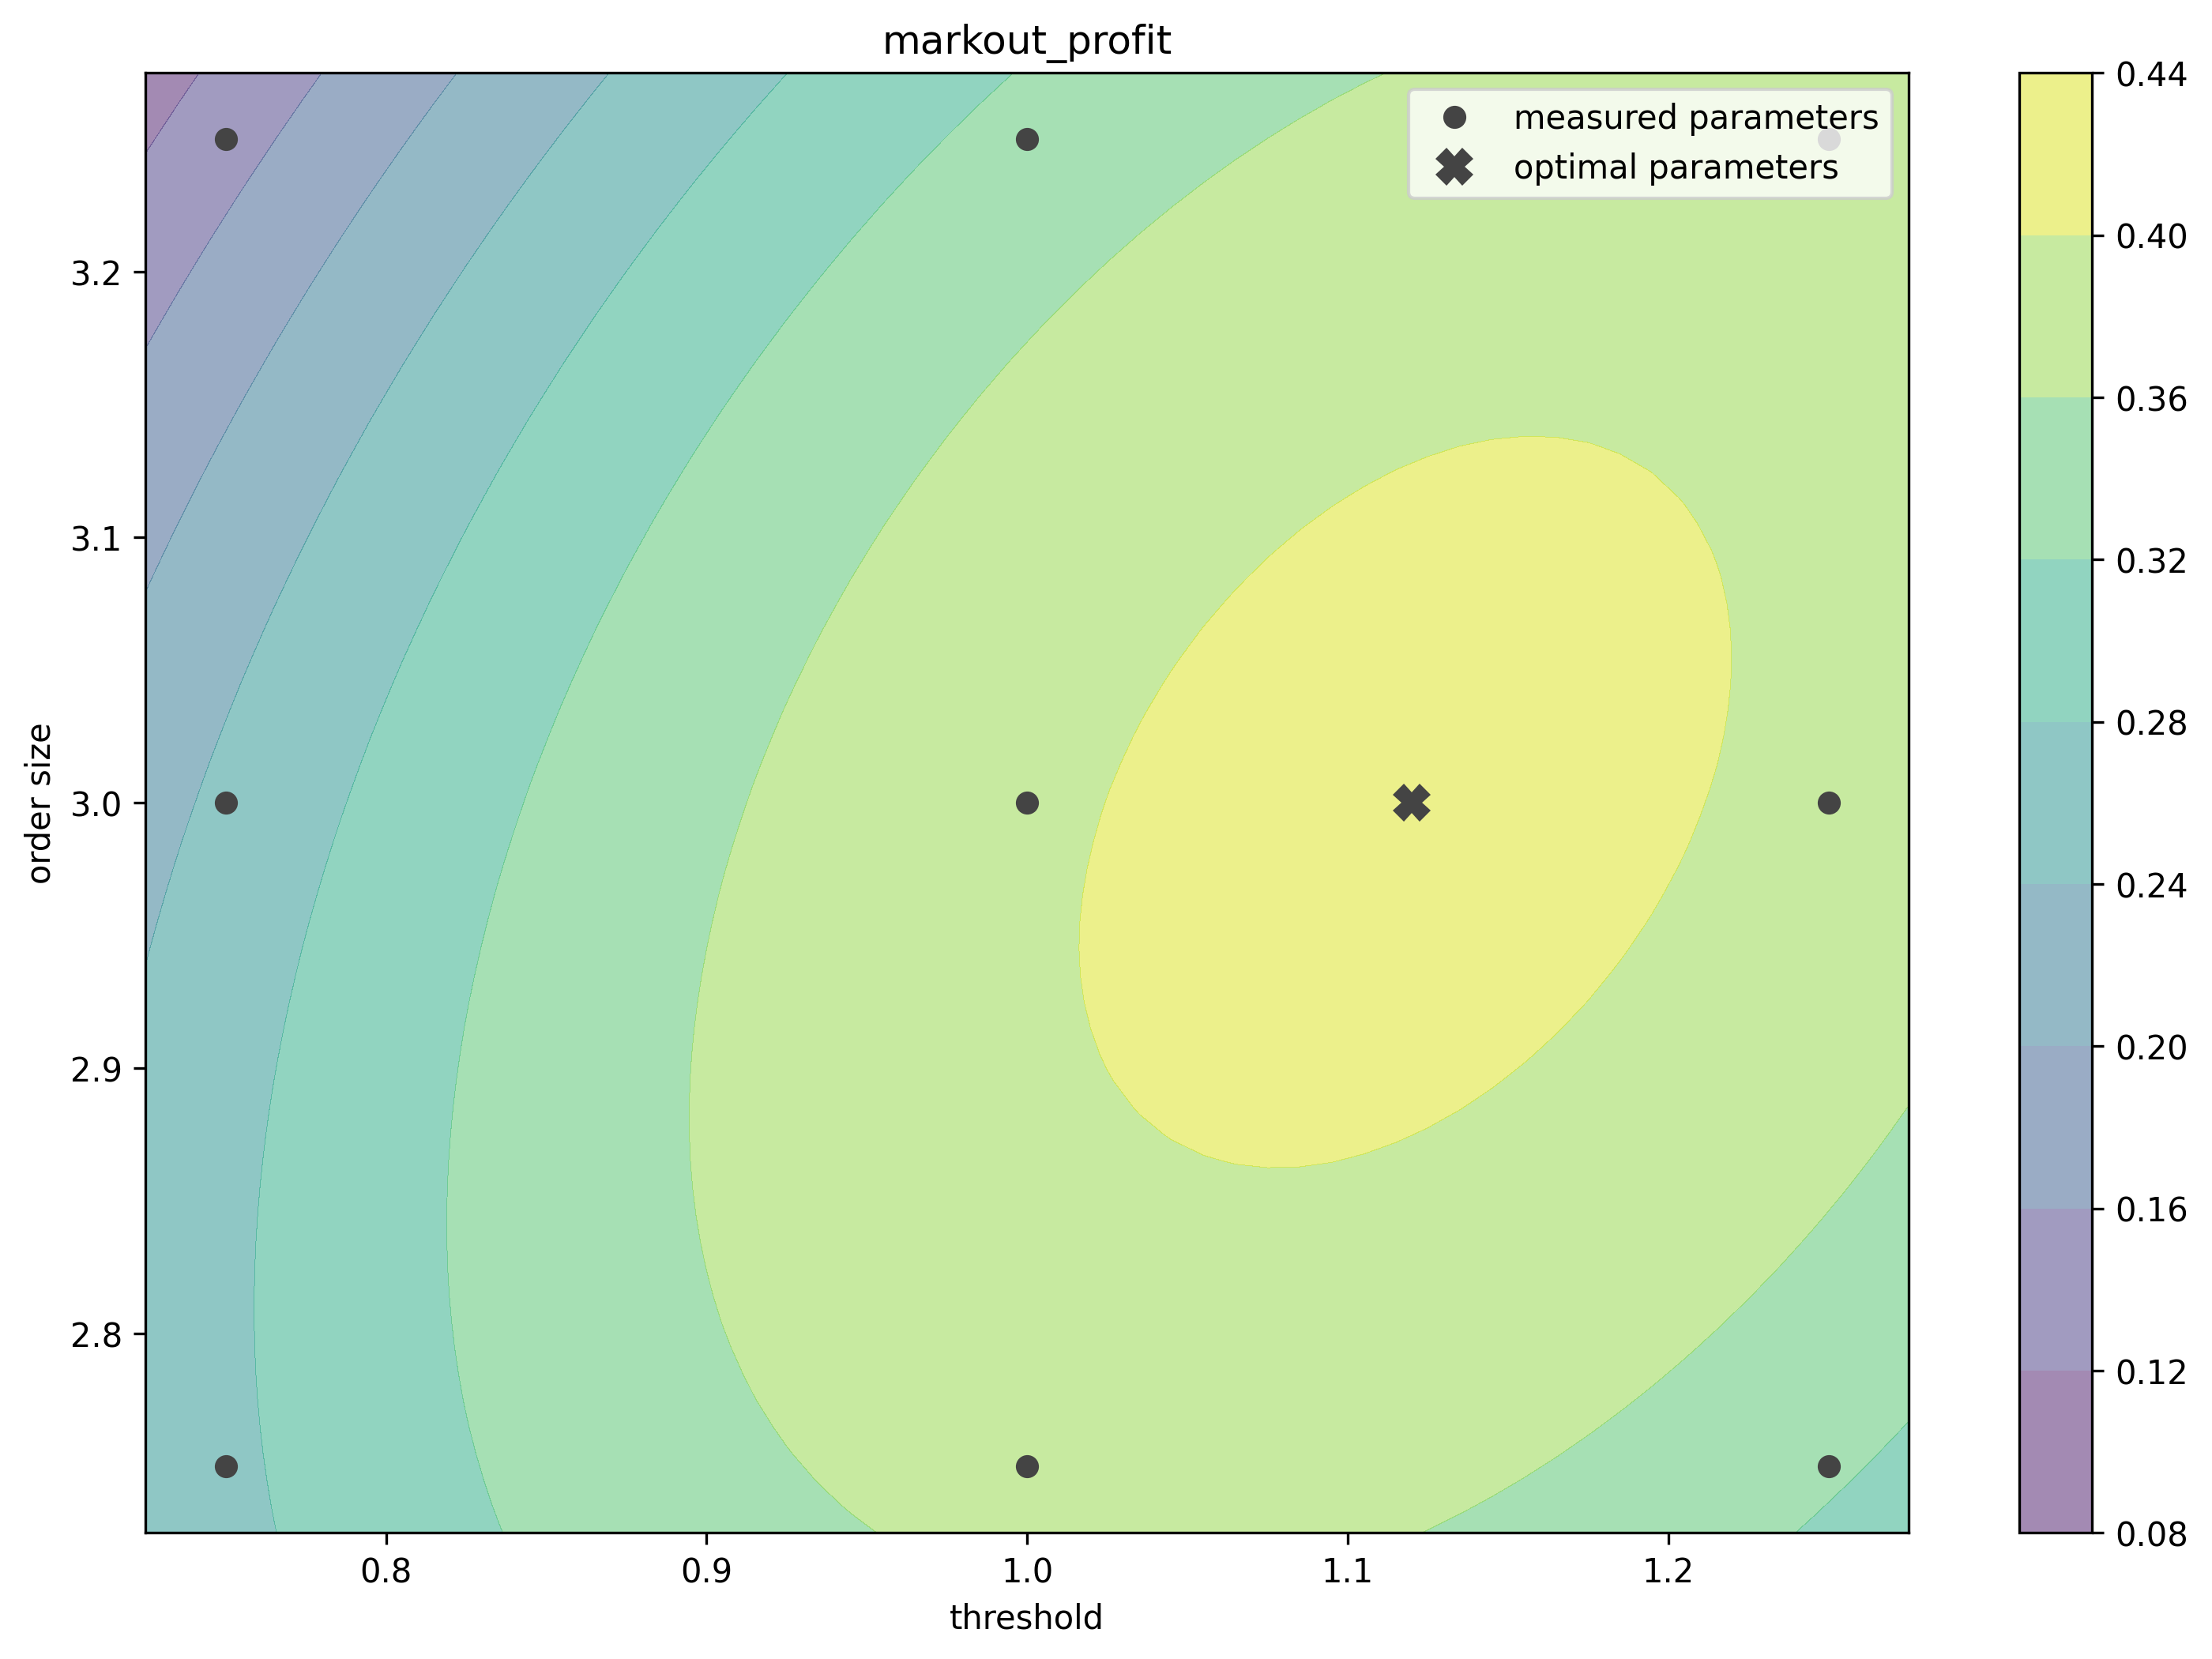

In [548]:
beta = linear_regression_2D(parameters, aggregate_measurements)
threshold_opt, order_size_opt, estimated_max_profit = optimize_2D(parameters, beta)
print(threshold_opt, order_size_opt, estimated_max_profit)

_plot_interpolation(parameters, aggregate_measurements, beta, (threshold_opt, order_size_opt))
plt.show()

#### Validate the Interpolation Estimate

Validation of the interpolation estimate involves making repeated measurements with the interpolated optimal parameter set. The number of measurements taken is the number calculated in the design stage. We then obtain business metric measurements with experimentation, at the optimal parameter set, obtain the expected value of the business metric data measured at the optimal parameter set, and the standard error of the estimate. If the interpolated optimal business metric is within the 95% confidence interval of the measured aggregate business metric, the interpolated optimal parameter set is accepted as valid. This means that if the interpolated optimal business metric was outside the 95% confidence interval, there would only be a 5% chance that we have declared a valid parameter set, invalid. The 95% confidence interval is used to declare a single value (the interpolated business metric) as plausibly coming from a particular distribution (the distribution of measured aggregate business metric).


Another possible validation procedure, involves an A/B test between the interpolated optimal parameter set, and the default parameter set. Response surface methodology uses interpolation to model different parameters together. With that said, response surface methodology is best used for three or less parameters (<= 3D). Note that each parameter will have its own list of parameter values.

In [553]:
aggregate_measurement, standard_error = run_experiment_2D(
    num_ind = 15000,            # number of data points from the design stage
    parameters=[(threshold_opt, order_size_opt)]
)
print(aggregate_measurement, standard_error)
print(aggregate_measurement[0] - 2* standard_error[0],      # 95% confidence interval
      aggregate_measurement[0] + 2* standard_error[0])      # our estimate falls within 95% confidence interval

[0.3683965665154249] [0.026124317540495563]
0.31614793143443376 0.42064520159641605
